In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('training.csv')

In [4]:
df2 = pd.read_csv('testing.csv')

In [5]:
#df = df[1:]

In [6]:
df.head()

,Experiment no.,Back-ground voltage (V),Pulse voltage (V),Pulse frequency (Hz),Pulse duty factor,Wire feed rate (m/min),Table feed rate(mm/s),RMS current (V),RMS voltage (V),UTS (Mpa)
0,1,17,34.6,130,0.50,9,3.760,1.1939,2.7429,412.28
1,2,17,34.6,130,0.50,9,3.760,1.1415,2.7449,415.79
2,3,14,30.0,80,0.35,11,5.635,1.4385,1.6834,0.00
3,4,14,39.0,80,0.35,7,5.635,1.1971,2.7190,328.71
4,5,14,30.0,182,0.65,11,5.635,1.2566,2.3814,385.98


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scalar_X = MinMaxScaler()
scalar_Y = MinMaxScaler()

In [10]:
X_train = df.drop(['Experiment no.','UTS (Mpa)'],axis=1)

In [11]:
y_train = df[['UTS (Mpa)']]

In [12]:
X_train  = scalar_X.fit_transform(X_train)
y_train = scalar_Y.fit_transform(y_train)

In [13]:
X_test = df2.drop(['Experiment no.','UTS (Mpa)'],axis=1)
y_test = df2[['UTS (Mpa)']]

X_test = scalar_X.transform(X_test)
y_test = scalar_Y.transform(y_test)

In [14]:
X_train.shape

(46, 8)

In [15]:
inputs = keras.Input(shape = (8))
x = layers.Dense(8,activation='linear',kernel_regularizer=keras.regularizers.l2(0.01),bias_initializer=keras.initializers.random_normal())(inputs)
x = layers.Dense(13,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.01),bias_initializer=keras.initializers.random_normal())(x)
x = layers.Dense(18,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.01),bias_initializer=keras.initializers.random_normal())(x)
output = layers.Dense(1)(x)
model = keras.Model(inputs,output)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 13)                117       
                                                                 
 dense_2 (Dense)             (None, 18)                252       
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 460
Trainable params: 460
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.compile(loss=keras.losses.MeanSquaredError(),optimizer = keras.optimizers.Adam(learning_rate=0.0000090),metrics=['mse'])

In [17]:
 history=model.fit(X_train,y_train,epochs=22000,verbose=1)
#model.evaluate(X_test,y_test)

Epoch 1/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3906 - mse: 0.0980
Epoch 2/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3905 - mse: 0.0980
Epoch 3/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3905 - mse: 0.0980
Epoch 4/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3904 - mse: 0.0980
Epoch 5/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3904 - mse: 0.0980
Epoch 6/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3904 - mse: 0.0980
Epoch 7/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3903 - mse: 0.0979
Epoch 8/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3903 - mse: 0.0979
Epoch 9/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3902 - mse: 0.0979
Epoch 10/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3902 - mse: 0.0979
Epoch 11/22000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 2ms/step - loss: 0.3872 - mse: 0.0970
Epoch 87/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3872 - mse: 0.0970
Epoch 88/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3872 - mse: 0.0970
Epoch 89/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3871 - mse: 0.0970
Epoch 90/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3871 - mse: 0.0970
Epoch 91/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3871 - mse: 0.0970
Epoch 92/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3870 - mse: 0.0970
Epoch 93/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3870 - mse: 0.0970
Epoch 94/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3870 - mse: 0.0969
Epoch 95/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3869 - mse: 0.0969
Epoch 96/22000
2/2 [==============================] - 0s 99

2/2 [==============================] - 0s 997us/step - loss: 0.3843 - mse: 0.0965
Epoch 172/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3843 - mse: 0.0965
Epoch 173/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3843 - mse: 0.0965
Epoch 174/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3843 - mse: 0.0965
Epoch 175/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3842 - mse: 0.0965
Epoch 176/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3842 - mse: 0.0965
Epoch 177/22000
2/2 [==============================] - 0s 989us/step - loss: 0.3842 - mse: 0.0965
Epoch 178/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3841 - mse: 0.0965
Epoch 179/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3841 - mse: 0.0965
Epoch 180/22000
2/2 [==============================] - 0s 992us/step - loss: 0.3841 - mse: 0.0964
Epoch 181/22000
2/2 [===========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3817 - mse: 0.0962
Epoch 256/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3817 - mse: 0.0962
Epoch 257/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3817 - mse: 0.0962
Epoch 258/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3817 - mse: 0.0962
Epoch 259/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3816 - mse: 0.0962
Epoch 260/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3816 - mse: 0.0962
Epoch 261/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3816 - mse: 0.0962
Epoch 262/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3815 - mse: 0.0962
Epoch 263/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3815 - mse: 0.0962
Epoch 264/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3815 - mse: 0.0962
Epoch 265/22000
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.3793 - mse: 0.0961
Epoch 340/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3793 - mse: 0.0961
Epoch 341/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3792 - mse: 0.0961
Epoch 342/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3792 - mse: 0.0961
Epoch 343/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3792 - mse: 0.0961
Epoch 344/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3792 - mse: 0.0961
Epoch 345/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3791 - mse: 0.0961
Epoch 346/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3791 - mse: 0.0961
Epoch 347/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3791 - mse: 0.0961
Epoch 348/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3790 - mse: 0.0961
Epoch 349/22000
2/2 [==============================]

2/2 [==============================] - 0s 2ms/step - loss: 0.3769 - mse: 0.0960
Epoch 425/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3769 - mse: 0.0960
Epoch 426/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3768 - mse: 0.0960
Epoch 427/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3768 - mse: 0.0960
Epoch 428/22000
2/2 [==============================] - 0s 7ms/step - loss: 0.3768 - mse: 0.0960
Epoch 429/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3767 - mse: 0.0960
Epoch 430/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3767 - mse: 0.0960
Epoch 431/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3767 - mse: 0.0960
Epoch 432/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3767 - mse: 0.0960
Epoch 433/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3766 - mse: 0.0960
Epoch 434/22000
2/2 [==============================]

2/2 [==============================] - 0s 996us/step - loss: 0.3745 - mse: 0.0960
Epoch 510/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3745 - mse: 0.0960
Epoch 511/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3744 - mse: 0.0960
Epoch 512/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3744 - mse: 0.0960
Epoch 513/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3744 - mse: 0.0960
Epoch 514/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3744 - mse: 0.0960
Epoch 515/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3743 - mse: 0.0960
Epoch 516/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3743 - mse: 0.0960
Epoch 517/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3743 - mse: 0.0960
Epoch 518/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3742 - mse: 0.0960
Epoch 519/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3721 - mse: 0.0960
Epoch 595/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3721 - mse: 0.0960
Epoch 596/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3721 - mse: 0.0960
Epoch 597/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3721 - mse: 0.0960
Epoch 598/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3720 - mse: 0.0960
Epoch 599/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3720 - mse: 0.0960
Epoch 600/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3720 - mse: 0.0960
Epoch 601/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3720 - mse: 0.0960
Epoch 602/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3719 - mse: 0.0960
Epoch 603/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3719 - mse: 0.0960
Epoch 604/22000
2/2 [==============================]

2/2 [==============================] - 0s 2ms/step - loss: 0.3698 - mse: 0.0959
Epoch 680/22000
2/2 [==============================] - 0s 990us/step - loss: 0.3698 - mse: 0.0959
Epoch 681/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3698 - mse: 0.0959
Epoch 682/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3697 - mse: 0.0959
Epoch 683/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3697 - mse: 0.0960
Epoch 684/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3697 - mse: 0.0959
Epoch 685/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3697 - mse: 0.0959
Epoch 686/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3696 - mse: 0.0959
Epoch 687/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3696 - mse: 0.0959
Epoch 688/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3696 - mse: 0.0959
Epoch 689/22000
2/2 [===========================

Epoch 764/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3675 - mse: 0.0959
Epoch 765/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3675 - mse: 0.0959
Epoch 766/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3675 - mse: 0.0959
Epoch 767/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3674 - mse: 0.0959
Epoch 768/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3674 - mse: 0.0959
Epoch 769/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3674 - mse: 0.0959
Epoch 770/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3673 - mse: 0.0959
Epoch 771/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3673 - mse: 0.0959
Epoch 772/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3673 - mse: 0.0959
Epoch 773/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3673 - mse: 0.0959
Epoch 774/22000
2/2 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.3652 - mse: 0.0959
Epoch 849/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3652 - mse: 0.0959
Epoch 850/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3652 - mse: 0.0959
Epoch 851/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3652 - mse: 0.0959
Epoch 852/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3651 - mse: 0.0959
Epoch 853/22000
2/2 [==============================] - 0s 995us/step - loss: 0.3651 - mse: 0.0959
Epoch 854/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3651 - mse: 0.0959
Epoch 855/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3651 - mse: 0.0959
Epoch 856/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3650 - mse: 0.0959
Epoch 857/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3650 - mse: 0.0959
Epoch 858/22000
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.3630 - mse: 0.0959
Epoch 934/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3629 - mse: 0.0959
Epoch 935/22000
2/2 [==============================] - 0s 995us/step - loss: 0.3629 - mse: 0.0959
Epoch 936/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3629 - mse: 0.0959
Epoch 937/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3629 - mse: 0.0959
Epoch 938/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3628 - mse: 0.0959
Epoch 939/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3628 - mse: 0.0959
Epoch 940/22000
2/2 [==============================] - 0s 995us/step - loss: 0.3628 - mse: 0.0959
Epoch 941/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3628 - mse: 0.0959
Epoch 942/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3627 - mse: 0.0959
Epoch 943/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3607 - mse: 0.0959
Epoch 1018/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3607 - mse: 0.0959
Epoch 1019/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3607 - mse: 0.0959
Epoch 1020/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3607 - mse: 0.0959
Epoch 1021/22000
2/2 [==============================] - 0s 994us/step - loss: 0.3606 - mse: 0.0959
Epoch 1022/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3606 - mse: 0.0959
Epoch 1023/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3606 - mse: 0.0959
Epoch 1024/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3606 - mse: 0.0959
Epoch 1025/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3605 - mse: 0.0959
Epoch 1026/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3605 - mse: 0.0959
Epoch 1027/22000
2/2 [===================

2/2 [==============================] - 0s 3ms/step - loss: 0.3585 - mse: 0.0959
Epoch 1102/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3585 - mse: 0.0959
Epoch 1103/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3585 - mse: 0.0959
Epoch 1104/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3584 - mse: 0.0959
Epoch 1105/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3584 - mse: 0.0959
Epoch 1106/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3584 - mse: 0.0959
Epoch 1107/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3583 - mse: 0.0959
Epoch 1108/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3583 - mse: 0.0959
Epoch 1109/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3583 - mse: 0.0959
Epoch 1110/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3583 - mse: 0.0959
Epoch 1111/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.3563 - mse: 0.0959
Epoch 1186/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3563 - mse: 0.0959
Epoch 1187/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3562 - mse: 0.0959
Epoch 1188/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3562 - mse: 0.0959
Epoch 1189/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3562 - mse: 0.0959
Epoch 1190/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3562 - mse: 0.0959
Epoch 1191/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3561 - mse: 0.0959
Epoch 1192/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3561 - mse: 0.0959
Epoch 1193/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3561 - mse: 0.0959
Epoch 1194/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3561 - mse: 0.0959
Epoch 1195/22000
2/2 [===================

2/2 [==============================] - 0s 997us/step - loss: 0.3541 - mse: 0.0959
Epoch 1270/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3541 - mse: 0.0959
Epoch 1271/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3540 - mse: 0.0959
Epoch 1272/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3540 - mse: 0.0959
Epoch 1273/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3540 - mse: 0.0959
Epoch 1274/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3540 - mse: 0.0959
Epoch 1275/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3539 - mse: 0.0959
Epoch 1276/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3539 - mse: 0.0959
Epoch 1277/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3539 - mse: 0.0959
Epoch 1278/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3538 - mse: 0.0959
Epoch 1279/22000
2/2 [=================

2/2 [==============================] - 0s 1ms/step - loss: 0.3519 - mse: 0.0959
Epoch 1354/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3519 - mse: 0.0959
Epoch 1355/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3518 - mse: 0.0959
Epoch 1356/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3518 - mse: 0.0959
Epoch 1357/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3518 - mse: 0.0959
Epoch 1358/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3518 - mse: 0.0959
Epoch 1359/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3517 - mse: 0.0959
Epoch 1360/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3517 - mse: 0.0959
Epoch 1361/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3517 - mse: 0.0959
Epoch 1362/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3517 - mse: 0.0959
Epoch 1363/22000
2/2 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.3497 - mse: 0.0958
Epoch 1438/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3497 - mse: 0.0958
Epoch 1439/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3497 - mse: 0.0958
Epoch 1440/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3496 - mse: 0.0958
Epoch 1441/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3496 - mse: 0.0958
Epoch 1442/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3496 - mse: 0.0958
Epoch 1443/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3496 - mse: 0.0958
Epoch 1444/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3495 - mse: 0.0958
Epoch 1445/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3495 - mse: 0.0958
Epoch 1446/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3495 - mse: 0.0959
Epoch 1447/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.3476 - mse: 0.0958
Epoch 1522/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3475 - mse: 0.0958
Epoch 1523/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3475 - mse: 0.0958
Epoch 1524/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3475 - mse: 0.0958
Epoch 1525/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3475 - mse: 0.0958
Epoch 1526/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3474 - mse: 0.0958
Epoch 1527/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3474 - mse: 0.0958
Epoch 1528/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3474 - mse: 0.0958
Epoch 1529/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3474 - mse: 0.0958
Epoch 1530/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3473 - mse: 0.0958
Epoch 1531/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.3454 - mse: 0.0958
Epoch 1606/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3454 - mse: 0.0958
Epoch 1607/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3454 - mse: 0.0958
Epoch 1608/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3453 - mse: 0.0958
Epoch 1609/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3453 - mse: 0.0958
Epoch 1610/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3453 - mse: 0.0958
Epoch 1611/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3453 - mse: 0.0958
Epoch 1612/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3452 - mse: 0.0958
Epoch 1613/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3452 - mse: 0.0958
Epoch 1614/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3452 - mse: 0.0958
Epoch 1615/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.3433 - mse: 0.0958
Epoch 1690/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3433 - mse: 0.0958
Epoch 1691/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3432 - mse: 0.0958
Epoch 1692/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3432 - mse: 0.0958
Epoch 1693/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3432 - mse: 0.0958
Epoch 1694/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3432 - mse: 0.0958
Epoch 1695/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3431 - mse: 0.0958
Epoch 1696/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3431 - mse: 0.0958
Epoch 1697/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3431 - mse: 0.0958
Epoch 1698/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3431 - mse: 0.0958
Epoch 1699/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.3412 - mse: 0.0958
Epoch 1774/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3411 - mse: 0.0958
Epoch 1775/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3411 - mse: 0.0958
Epoch 1776/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3411 - mse: 0.0958
Epoch 1777/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3411 - mse: 0.0958
Epoch 1778/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3410 - mse: 0.0958
Epoch 1779/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3410 - mse: 0.0958
Epoch 1780/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3410 - mse: 0.0958
Epoch 1781/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3410 - mse: 0.0958
Epoch 1782/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3409 - mse: 0.0958
Epoch 1783/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3391 - mse: 0.0958
Epoch 1858/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3390 - mse: 0.0958
Epoch 1859/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3390 - mse: 0.0958
Epoch 1860/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3390 - mse: 0.0958
Epoch 1861/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3390 - mse: 0.0958
Epoch 1862/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3389 - mse: 0.0958
Epoch 1863/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3389 - mse: 0.0958
Epoch 1864/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3389 - mse: 0.0958
Epoch 1865/22000
2/2 [==============================] - 0s 995us/step - loss: 0.3389 - mse: 0.0958
Epoch 1866/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3388 - mse: 0.0958
Epoch 1867/22000
2/2 [===============

2/2 [==============================] - 0s 996us/step - loss: 0.3370 - mse: 0.0958
Epoch 1942/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3369 - mse: 0.0958
Epoch 1943/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3369 - mse: 0.0958
Epoch 1944/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3369 - mse: 0.0958
Epoch 1945/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3369 - mse: 0.0958
Epoch 1946/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3368 - mse: 0.0958
Epoch 1947/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3368 - mse: 0.0958
Epoch 1948/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3368 - mse: 0.0958
Epoch 1949/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3368 - mse: 0.0958
Epoch 1950/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3367 - mse: 0.0958
Epoch 1951/22000
2/2 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.3349 - mse: 0.0958
Epoch 2026/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3349 - mse: 0.0958
Epoch 2027/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3348 - mse: 0.0958
Epoch 2028/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3348 - mse: 0.0958
Epoch 2029/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3348 - mse: 0.0958
Epoch 2030/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3348 - mse: 0.0958
Epoch 2031/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3347 - mse: 0.0958
Epoch 2032/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3347 - mse: 0.0958
Epoch 2033/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3347 - mse: 0.0958
Epoch 2034/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3347 - mse: 0.0958
Epoch 2035/22000
2/2 [=======================

2/2 [==============================] - 0s 997us/step - loss: 0.3328 - mse: 0.0958
Epoch 2110/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3328 - mse: 0.0958
Epoch 2111/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3328 - mse: 0.0958
Epoch 2112/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3327 - mse: 0.0958
Epoch 2113/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3327 - mse: 0.0958
Epoch 2114/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3327 - mse: 0.0958
Epoch 2115/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3327 - mse: 0.0958
Epoch 2116/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3326 - mse: 0.0958
Epoch 2117/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3326 - mse: 0.0958
Epoch 2118/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3326 - mse: 0.0958
Epoch 2119/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3308 - mse: 0.0958
Epoch 2194/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3307 - mse: 0.0958
Epoch 2195/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3307 - mse: 0.0958
Epoch 2196/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3307 - mse: 0.0958
Epoch 2197/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3307 - mse: 0.0958
Epoch 2198/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3306 - mse: 0.0958
Epoch 2199/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3306 - mse: 0.0958
Epoch 2200/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3306 - mse: 0.0958
Epoch 2201/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3306 - mse: 0.0958
Epoch 2202/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3305 - mse: 0.0958
Epoch 2203/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3287 - mse: 0.0958
Epoch 2278/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3287 - mse: 0.0958
Epoch 2279/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3287 - mse: 0.0958
Epoch 2280/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3286 - mse: 0.0958
Epoch 2281/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3286 - mse: 0.0958
Epoch 2282/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3286 - mse: 0.0958
Epoch 2283/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3286 - mse: 0.0958
Epoch 2284/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3285 - mse: 0.0958
Epoch 2285/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3285 - mse: 0.0958
Epoch 2286/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3285 - mse: 0.0958
Epoch 2287/22000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.3267 - mse: 0.0958
Epoch 2362/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3267 - mse: 0.0958
Epoch 2363/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3266 - mse: 0.0958
Epoch 2364/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3266 - mse: 0.0958
Epoch 2365/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3266 - mse: 0.0958
Epoch 2366/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3266 - mse: 0.0958
Epoch 2367/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3265 - mse: 0.0958
Epoch 2368/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3265 - mse: 0.0958
Epoch 2369/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3265 - mse: 0.0958
Epoch 2370/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3265 - mse: 0.0958
Epoch 2371/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3247 - mse: 0.0958
Epoch 2446/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3246 - mse: 0.0958
Epoch 2447/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3246 - mse: 0.0958
Epoch 2448/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3246 - mse: 0.0958
Epoch 2449/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3246 - mse: 0.0958
Epoch 2450/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3246 - mse: 0.0958
Epoch 2451/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3245 - mse: 0.0958
Epoch 2452/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3245 - mse: 0.0958
Epoch 2453/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3245 - mse: 0.0958
Epoch 2454/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3245 - mse: 0.0958
Epoch 2455/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3227 - mse: 0.0958
Epoch 2530/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3226 - mse: 0.0957
Epoch 2531/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3226 - mse: 0.0958
Epoch 2532/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3226 - mse: 0.0957
Epoch 2533/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3226 - mse: 0.0957
Epoch 2534/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3226 - mse: 0.0958
Epoch 2535/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3225 - mse: 0.0957
Epoch 2536/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3225 - mse: 0.0957
Epoch 2537/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3225 - mse: 0.0957
Epoch 2538/22000
2/2 [==============================] - 0s 982us/step - loss: 0.3225 - mse: 0.0957
Epoch 2539/22000
2/2 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.3207 - mse: 0.0957
Epoch 2614/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3207 - mse: 0.0957
Epoch 2615/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3206 - mse: 0.0957
Epoch 2616/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3206 - mse: 0.0957
Epoch 2617/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3206 - mse: 0.0957
Epoch 2618/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3206 - mse: 0.0957
Epoch 2619/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3205 - mse: 0.0957
Epoch 2620/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3205 - mse: 0.0957
Epoch 2621/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3205 - mse: 0.0957
Epoch 2622/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3205 - mse: 0.0957
Epoch 2623/22000
2/2 [=======================

2/2 [==============================] - 0s 997us/step - loss: 0.3187 - mse: 0.0957
Epoch 2698/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3187 - mse: 0.0957
Epoch 2699/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3187 - mse: 0.0957
Epoch 2700/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3186 - mse: 0.0957
Epoch 2701/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3186 - mse: 0.0957
Epoch 2702/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3186 - mse: 0.0957
Epoch 2703/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3186 - mse: 0.0957
Epoch 2704/22000
2/2 [==============================] - 0s 995us/step - loss: 0.3186 - mse: 0.0957
Epoch 2705/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3185 - mse: 0.0957
Epoch 2706/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3185 - mse: 0.0957
Epoch 2707/22000
2/2 [=====================

2/2 [==============================] - 0s 998us/step - loss: 0.3168 - mse: 0.0957
Epoch 2782/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3167 - mse: 0.0957
Epoch 2783/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3167 - mse: 0.0957
Epoch 2784/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3167 - mse: 0.0957
Epoch 2785/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3167 - mse: 0.0957
Epoch 2786/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3166 - mse: 0.0957
Epoch 2787/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3166 - mse: 0.0957
Epoch 2788/22000
2/2 [==============================] - 0s 993us/step - loss: 0.3166 - mse: 0.0957
Epoch 2789/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3166 - mse: 0.0957
Epoch 2790/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3166 - mse: 0.0957
Epoch 2791/22000
2/2 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.3148 - mse: 0.0957
Epoch 2866/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3148 - mse: 0.0957
Epoch 2867/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3148 - mse: 0.0957
Epoch 2868/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3147 - mse: 0.0957
Epoch 2869/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3147 - mse: 0.0957
Epoch 2870/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3147 - mse: 0.0957
Epoch 2871/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3147 - mse: 0.0957
Epoch 2872/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3147 - mse: 0.0957
Epoch 2873/22000
2/2 [==============================] - 0s 996us/step - loss: 0.3146 - mse: 0.0957
Epoch 2874/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3146 - mse: 0.0957
Epoch 2875/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.3129 - mse: 0.0957
Epoch 2950/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3129 - mse: 0.0957
Epoch 2951/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - mse: 0.0957
Epoch 2952/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - mse: 0.0957
Epoch 2953/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3128 - mse: 0.0957
Epoch 2954/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - mse: 0.0957
Epoch 2955/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3127 - mse: 0.0957
Epoch 2956/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3127 - mse: 0.0957
Epoch 2957/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3127 - mse: 0.0957
Epoch 2958/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3127 - mse: 0.0957
Epoch 2959/22000
2/2 [=======================

2/2 [==============================] - 0s 997us/step - loss: 0.3110 - mse: 0.0957
Epoch 3034/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3109 - mse: 0.0957
Epoch 3035/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3109 - mse: 0.0957
Epoch 3036/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3109 - mse: 0.0957
Epoch 3037/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3109 - mse: 0.0957
Epoch 3038/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3109 - mse: 0.0957
Epoch 3039/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3108 - mse: 0.0957
Epoch 3040/22000
2/2 [==============================] - 0s 998us/step - loss: 0.3108 - mse: 0.0957
Epoch 3041/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3108 - mse: 0.0957
Epoch 3042/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3108 - mse: 0.0957
Epoch 3043/22000
2/2 [===================

2/2 [==============================] - 0s 1ms/step - loss: 0.3091 - mse: 0.0957
Epoch 3118/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3090 - mse: 0.0957
Epoch 3119/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3090 - mse: 0.0957
Epoch 3120/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3090 - mse: 0.0957
Epoch 3121/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3090 - mse: 0.0957
Epoch 3122/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3089 - mse: 0.0957
Epoch 3123/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3089 - mse: 0.0957
Epoch 3124/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3089 - mse: 0.0957
Epoch 3125/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3089 - mse: 0.0957
Epoch 3126/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3089 - mse: 0.0957
Epoch 3127/22000
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 0.3072 - mse: 0.0957
Epoch 3202/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3071 - mse: 0.0957
Epoch 3203/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3071 - mse: 0.0957
Epoch 3204/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3071 - mse: 0.0957
Epoch 3205/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3071 - mse: 0.0957
Epoch 3206/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3071 - mse: 0.0957
Epoch 3207/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3070 - mse: 0.0957
Epoch 3208/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3070 - mse: 0.0957
Epoch 3209/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3070 - mse: 0.0957
Epoch 3210/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3070 - mse: 0.0957
Epoch 3211/22000
2/2 [===================

2/2 [==============================] - 0s 2ms/step - loss: 0.3053 - mse: 0.0957
Epoch 3286/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3053 - mse: 0.0957
Epoch 3287/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3052 - mse: 0.0957
Epoch 3288/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3052 - mse: 0.0957
Epoch 3289/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3052 - mse: 0.0957
Epoch 3290/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3052 - mse: 0.0957
Epoch 3291/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3052 - mse: 0.0957
Epoch 3292/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3051 - mse: 0.0957
Epoch 3293/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3051 - mse: 0.0957
Epoch 3294/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3051 - mse: 0.0957
Epoch 3295/22000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.3034 - mse: 0.0957
Epoch 3370/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3034 - mse: 0.0957
Epoch 3371/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3034 - mse: 0.0957
Epoch 3372/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3034 - mse: 0.0957
Epoch 3373/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3033 - mse: 0.0957
Epoch 3374/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3033 - mse: 0.0957
Epoch 3375/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3033 - mse: 0.0957
Epoch 3376/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3033 - mse: 0.0957
Epoch 3377/22000
2/2 [==============================] - 0s 997us/step - loss: 0.3032 - mse: 0.0957
Epoch 3378/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3032 - mse: 0.0957
Epoch 3379/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.3016 - mse: 0.0957
Epoch 3454/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3016 - mse: 0.0957
Epoch 3455/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3015 - mse: 0.0957
Epoch 3456/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3015 - mse: 0.0957
Epoch 3457/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3015 - mse: 0.0957
Epoch 3458/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3015 - mse: 0.0957
Epoch 3459/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3015 - mse: 0.0957
Epoch 3460/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.3014 - mse: 0.0957
Epoch 3461/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.3014 - mse: 0.0957
Epoch 3462/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.3014 - mse: 0.0957
Epoch 3463/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2998 - mse: 0.0957
Epoch 3538/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2997 - mse: 0.0957
Epoch 3539/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2997 - mse: 0.0957
Epoch 3540/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2997 - mse: 0.0957
Epoch 3541/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2997 - mse: 0.0957
Epoch 3542/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2996 - mse: 0.0957
Epoch 3543/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2996 - mse: 0.0957
Epoch 3544/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2996 - mse: 0.0957
Epoch 3545/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2996 - mse: 0.0957
Epoch 3546/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2996 - mse: 0.0957
Epoch 3547/22000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 0.2979 - mse: 0.0957
Epoch 3622/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2979 - mse: 0.0957
Epoch 3623/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2979 - mse: 0.0957
Epoch 3624/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2979 - mse: 0.0957
Epoch 3625/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2979 - mse: 0.0957
Epoch 3626/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2978 - mse: 0.0957
Epoch 3627/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2978 - mse: 0.0957
Epoch 3628/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2978 - mse: 0.0957
Epoch 3629/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2978 - mse: 0.0957
Epoch 3630/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2977 - mse: 0.0957
Epoch 3631/22000
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 0.2961 - mse: 0.0957
Epoch 3706/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2961 - mse: 0.0957
Epoch 3707/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2961 - mse: 0.0957
Epoch 3708/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2961 - mse: 0.0957
Epoch 3709/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2960 - mse: 0.0957
Epoch 3710/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2960 - mse: 0.0957
Epoch 3711/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2960 - mse: 0.0957
Epoch 3712/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2960 - mse: 0.0957
Epoch 3713/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2960 - mse: 0.0957
Epoch 3714/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2959 - mse: 0.0957
Epoch 3715/22000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 0.2943 - mse: 0.0957
Epoch 3790/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2943 - mse: 0.0957
Epoch 3791/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2943 - mse: 0.0957
Epoch 3792/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2943 - mse: 0.0957
Epoch 3793/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2942 - mse: 0.0957
Epoch 3794/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2942 - mse: 0.0957
Epoch 3795/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2942 - mse: 0.0957
Epoch 3796/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2942 - mse: 0.0957
Epoch 3797/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2942 - mse: 0.0957
Epoch 3798/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2941 - mse: 0.0957
Epoch 3799/22000
2/2 [=================

2/2 [==============================] - 0s 997us/step - loss: 0.2925 - mse: 0.0957
Epoch 3874/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2925 - mse: 0.0957
Epoch 3875/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2925 - mse: 0.0957
Epoch 3876/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2925 - mse: 0.0957
Epoch 3877/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2925 - mse: 0.0957
Epoch 3878/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2924 - mse: 0.0957
Epoch 3879/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2924 - mse: 0.0957
Epoch 3880/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2924 - mse: 0.0957
Epoch 3881/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2924 - mse: 0.0957
Epoch 3882/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2924 - mse: 0.0957
Epoch 3883/22000
2/2 [=====================

2/2 [==============================] - 0s 996us/step - loss: 0.2908 - mse: 0.0957
Epoch 3958/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2907 - mse: 0.0957
Epoch 3959/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2907 - mse: 0.0957
Epoch 3960/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2907 - mse: 0.0957
Epoch 3961/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2907 - mse: 0.0957
Epoch 3962/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2907 - mse: 0.0957
Epoch 3963/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2906 - mse: 0.0957
Epoch 3964/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2906 - mse: 0.0957
Epoch 3965/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2906 - mse: 0.0957
Epoch 3966/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2906 - mse: 0.0957
Epoch 3967/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2890 - mse: 0.0957
Epoch 4042/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2890 - mse: 0.0957
Epoch 4043/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2890 - mse: 0.0957
Epoch 4044/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2889 - mse: 0.0957
Epoch 4045/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2889 - mse: 0.0957
Epoch 4046/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2889 - mse: 0.0957
Epoch 4047/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2889 - mse: 0.0957
Epoch 4048/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2889 - mse: 0.0957
Epoch 4049/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2888 - mse: 0.0957
Epoch 4050/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2888 - mse: 0.0957
Epoch 4051/22000
2/2 [=====================

2/2 [==============================] - 0s 998us/step - loss: 0.2873 - mse: 0.0957
Epoch 4126/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2872 - mse: 0.0957
Epoch 4127/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2872 - mse: 0.0957
Epoch 4128/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2872 - mse: 0.0957
Epoch 4129/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2872 - mse: 0.0957
Epoch 4130/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2871 - mse: 0.0957
Epoch 4131/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2871 - mse: 0.0957
Epoch 4132/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2871 - mse: 0.0957
Epoch 4133/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2871 - mse: 0.0957
Epoch 4134/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2871 - mse: 0.0957
Epoch 4135/22000
2/2 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.2855 - mse: 0.0957
Epoch 4210/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2855 - mse: 0.0957
Epoch 4211/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2855 - mse: 0.0957
Epoch 4212/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2854 - mse: 0.0957
Epoch 4213/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2854 - mse: 0.0957
Epoch 4214/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2854 - mse: 0.0957
Epoch 4215/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2854 - mse: 0.0957
Epoch 4216/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2854 - mse: 0.0957
Epoch 4217/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2853 - mse: 0.0957
Epoch 4218/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2853 - mse: 0.0957
Epoch 4219/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2838 - mse: 0.0957
Epoch 4294/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2837 - mse: 0.0957
Epoch 4295/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2837 - mse: 0.0957
Epoch 4296/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2837 - mse: 0.0957
Epoch 4297/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2837 - mse: 0.0957
Epoch 4298/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2837 - mse: 0.0957
Epoch 4299/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2836 - mse: 0.0957
Epoch 4300/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2836 - mse: 0.0957
Epoch 4301/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2836 - mse: 0.0957
Epoch 4302/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2836 - mse: 0.0957
Epoch 4303/22000
2/2 [===================

2/2 [==============================] - 0s 2ms/step - loss: 0.2820 - mse: 0.0957
Epoch 4378/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2820 - mse: 0.0957
Epoch 4379/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2820 - mse: 0.0957
Epoch 4380/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2820 - mse: 0.0957
Epoch 4381/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2820 - mse: 0.0957
Epoch 4382/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2819 - mse: 0.0957
Epoch 4383/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2819 - mse: 0.0957
Epoch 4384/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2819 - mse: 0.0957
Epoch 4385/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2819 - mse: 0.0957
Epoch 4386/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2819 - mse: 0.0957
Epoch 4387/22000
2/2 [===============

2/2 [==============================] - 0s 995us/step - loss: 0.2803 - mse: 0.0957
Epoch 4462/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2803 - mse: 0.0957
Epoch 4463/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2803 - mse: 0.0957
Epoch 4464/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2803 - mse: 0.0957
Epoch 4465/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2802 - mse: 0.0957
Epoch 4466/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2802 - mse: 0.0957
Epoch 4467/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2802 - mse: 0.0957
Epoch 4468/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2802 - mse: 0.0957
Epoch 4469/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2802 - mse: 0.0957
Epoch 4470/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2801 - mse: 0.0957
Epoch 4471/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2786 - mse: 0.0958
Epoch 4546/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2786 - mse: 0.0957
Epoch 4547/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2786 - mse: 0.0957
Epoch 4548/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2786 - mse: 0.0957
Epoch 4549/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2785 - mse: 0.0957
Epoch 4550/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2785 - mse: 0.0957
Epoch 4551/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2785 - mse: 0.0957
Epoch 4552/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2785 - mse: 0.0957
Epoch 4553/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2785 - mse: 0.0957
Epoch 4554/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2784 - mse: 0.0957
Epoch 4555/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2769 - mse: 0.0958
Epoch 4630/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2769 - mse: 0.0958
Epoch 4631/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2769 - mse: 0.0958
Epoch 4632/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2769 - mse: 0.0958
Epoch 4633/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2768 - mse: 0.0958
Epoch 4634/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2768 - mse: 0.0958
Epoch 4635/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2768 - mse: 0.0958
Epoch 4636/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2768 - mse: 0.0958
Epoch 4637/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2768 - mse: 0.0958
Epoch 4638/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2767 - mse: 0.0958
Epoch 4639/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2752 - mse: 0.0958
Epoch 4714/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2752 - mse: 0.0958
Epoch 4715/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2752 - mse: 0.0958
Epoch 4716/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2752 - mse: 0.0958
Epoch 4717/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2752 - mse: 0.0958
Epoch 4718/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2751 - mse: 0.0958
Epoch 4719/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2751 - mse: 0.0958
Epoch 4720/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2751 - mse: 0.0958
Epoch 4721/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2751 - mse: 0.0958
Epoch 4722/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2751 - mse: 0.0958
Epoch 4723/22000
2/2 [===================

2/2 [==============================] - 0s 2ms/step - loss: 0.2736 - mse: 0.0958
Epoch 4798/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2735 - mse: 0.0958
Epoch 4799/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2735 - mse: 0.0958
Epoch 4800/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2735 - mse: 0.0958
Epoch 4801/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2735 - mse: 0.0958
Epoch 4802/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2735 - mse: 0.0958
Epoch 4803/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2734 - mse: 0.0958
Epoch 4804/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2734 - mse: 0.0958
Epoch 4805/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2734 - mse: 0.0958
Epoch 4806/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2734 - mse: 0.0958
Epoch 4807/22000
2/2 [=======================

2/2 [==============================] - 0s 997us/step - loss: 0.2719 - mse: 0.0958
Epoch 4882/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2719 - mse: 0.0958
Epoch 4883/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2719 - mse: 0.0958
Epoch 4884/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2718 - mse: 0.0958
Epoch 4885/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2718 - mse: 0.0958
Epoch 4886/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2718 - mse: 0.0958
Epoch 4887/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2718 - mse: 0.0958
Epoch 4888/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2718 - mse: 0.0958
Epoch 4889/22000
2/2 [==============================] - 0s 1000us/step - loss: 0.2717 - mse: 0.0958
Epoch 4890/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2717 - mse: 0.0958
Epoch 4891/22000
2/2 [==================

2/2 [==============================] - 0s 2ms/step - loss: 0.2702 - mse: 0.0958
Epoch 4966/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2702 - mse: 0.0958
Epoch 4967/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2702 - mse: 0.0958
Epoch 4968/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2702 - mse: 0.0958
Epoch 4969/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2702 - mse: 0.0958
Epoch 4970/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2701 - mse: 0.0958
Epoch 4971/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2701 - mse: 0.0958
Epoch 4972/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2701 - mse: 0.0958
Epoch 4973/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2701 - mse: 0.0958
Epoch 4974/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2701 - mse: 0.0958
Epoch 4975/22000
2/2 [=======================

2/2 [==============================] - 0s 997us/step - loss: 0.2686 - mse: 0.0958
Epoch 5050/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2686 - mse: 0.0958
Epoch 5051/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2686 - mse: 0.0958
Epoch 5052/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2686 - mse: 0.0958
Epoch 5053/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2685 - mse: 0.0958
Epoch 5054/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2685 - mse: 0.0958
Epoch 5055/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2685 - mse: 0.0958
Epoch 5056/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2685 - mse: 0.0958
Epoch 5057/22000
2/2 [==============================] - 0s 1000us/step - loss: 0.2684 - mse: 0.0958
Epoch 5058/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2684 - mse: 0.0958
Epoch 5059/22000
2/2 [==================

2/2 [==============================] - 0s 1ms/step - loss: 0.2670 - mse: 0.0958
Epoch 5134/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2670 - mse: 0.0958
Epoch 5135/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2669 - mse: 0.0958
Epoch 5136/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2669 - mse: 0.0958
Epoch 5137/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2669 - mse: 0.0958
Epoch 5138/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2669 - mse: 0.0958
Epoch 5139/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2669 - mse: 0.0958
Epoch 5140/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2668 - mse: 0.0958
Epoch 5141/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2668 - mse: 0.0958
Epoch 5142/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2668 - mse: 0.0958
Epoch 5143/22000
2/2 [=================

2/2 [==============================] - 0s 998us/step - loss: 0.2654 - mse: 0.0958
Epoch 5218/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2653 - mse: 0.0958
Epoch 5219/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2653 - mse: 0.0958
Epoch 5220/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2653 - mse: 0.0958
Epoch 5221/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2653 - mse: 0.0958
Epoch 5222/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2653 - mse: 0.0958
Epoch 5223/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2653 - mse: 0.0958
Epoch 5224/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2652 - mse: 0.0958
Epoch 5225/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2652 - mse: 0.0958
Epoch 5226/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2652 - mse: 0.0958
Epoch 5227/22000
2/2 [===================

2/2 [==============================] - 0s 2ms/step - loss: 0.2638 - mse: 0.0958
Epoch 5302/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2637 - mse: 0.0958
Epoch 5303/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2637 - mse: 0.0958
Epoch 5304/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2637 - mse: 0.0958
Epoch 5305/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2637 - mse: 0.0958
Epoch 5306/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2637 - mse: 0.0958
Epoch 5307/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2636 - mse: 0.0958
Epoch 5308/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2636 - mse: 0.0958
Epoch 5309/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2636 - mse: 0.0958
Epoch 5310/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2636 - mse: 0.0958
Epoch 5311/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2622 - mse: 0.0958
Epoch 5386/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2622 - mse: 0.0958
Epoch 5387/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2621 - mse: 0.0958
Epoch 5388/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2621 - mse: 0.0958
Epoch 5389/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2621 - mse: 0.0958
Epoch 5390/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2621 - mse: 0.0958
Epoch 5391/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2621 - mse: 0.0958
Epoch 5392/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2620 - mse: 0.0958
Epoch 5393/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2620 - mse: 0.0958
Epoch 5394/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2620 - mse: 0.0958
Epoch 5395/22000
2/2 [===================

2/2 [==============================] - 0s 2ms/step - loss: 0.2606 - mse: 0.0958
Epoch 5470/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2606 - mse: 0.0958
Epoch 5471/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2606 - mse: 0.0958
Epoch 5472/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2605 - mse: 0.0958
Epoch 5473/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2605 - mse: 0.0958
Epoch 5474/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2605 - mse: 0.0958
Epoch 5475/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2605 - mse: 0.0958
Epoch 5476/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2605 - mse: 0.0958
Epoch 5477/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2604 - mse: 0.0958
Epoch 5478/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2604 - mse: 0.0958
Epoch 5479/22000
2/2 [===================

2/2 [==============================] - 0s 2ms/step - loss: 0.2590 - mse: 0.0958
Epoch 5554/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2590 - mse: 0.0958
Epoch 5555/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2590 - mse: 0.0958
Epoch 5556/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2590 - mse: 0.0958
Epoch 5557/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2590 - mse: 0.0958
Epoch 5558/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2589 - mse: 0.0958
Epoch 5559/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2589 - mse: 0.0958
Epoch 5560/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2589 - mse: 0.0958
Epoch 5561/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2589 - mse: 0.0958
Epoch 5562/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2589 - mse: 0.0958
Epoch 5563/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2575 - mse: 0.0958
Epoch 5638/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2575 - mse: 0.0958
Epoch 5639/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2574 - mse: 0.0958
Epoch 5640/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2574 - mse: 0.0958
Epoch 5641/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2574 - mse: 0.0958
Epoch 5642/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2574 - mse: 0.0958
Epoch 5643/22000
2/2 [==============================] - 0s 993us/step - loss: 0.2574 - mse: 0.0958
Epoch 5644/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2574 - mse: 0.0958
Epoch 5645/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2573 - mse: 0.0958
Epoch 5646/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2573 - mse: 0.0958
Epoch 5647/22000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 0.2559 - mse: 0.0958
Epoch 5722/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2559 - mse: 0.0958
Epoch 5723/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2559 - mse: 0.0958
Epoch 5724/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2559 - mse: 0.0958
Epoch 5725/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2559 - mse: 0.0958
Epoch 5726/22000
2/2 [==============================] - 0s 994us/step - loss: 0.2558 - mse: 0.0958
Epoch 5727/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2558 - mse: 0.0958
Epoch 5728/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2558 - mse: 0.0958
Epoch 5729/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2558 - mse: 0.0958
Epoch 5730/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2558 - mse: 0.0958
Epoch 5731/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2544 - mse: 0.0958
Epoch 5806/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2544 - mse: 0.0958
Epoch 5807/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2544 - mse: 0.0958
Epoch 5808/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2544 - mse: 0.0958
Epoch 5809/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2543 - mse: 0.0958
Epoch 5810/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2543 - mse: 0.0958
Epoch 5811/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2543 - mse: 0.0958
Epoch 5812/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2543 - mse: 0.0958
Epoch 5813/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2543 - mse: 0.0958
Epoch 5814/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2542 - mse: 0.0958
Epoch 5815/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2529 - mse: 0.0959
Epoch 5890/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2529 - mse: 0.0959
Epoch 5891/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2529 - mse: 0.0959
Epoch 5892/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2528 - mse: 0.0959
Epoch 5893/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2528 - mse: 0.0959
Epoch 5894/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2528 - mse: 0.0959
Epoch 5895/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2528 - mse: 0.0959
Epoch 5896/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2528 - mse: 0.0959
Epoch 5897/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2528 - mse: 0.0959
Epoch 5898/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2527 - mse: 0.0959
Epoch 5899/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.2514 - mse: 0.0959
Epoch 5974/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2514 - mse: 0.0959
Epoch 5975/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2513 - mse: 0.0959
Epoch 5976/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2513 - mse: 0.0959
Epoch 5977/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2513 - mse: 0.0959
Epoch 5978/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2513 - mse: 0.0959
Epoch 5979/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2513 - mse: 0.0959
Epoch 5980/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2513 - mse: 0.0959
Epoch 5981/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2512 - mse: 0.0959
Epoch 5982/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2512 - mse: 0.0959
Epoch 5983/22000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 0.2499 - mse: 0.0959
Epoch 6058/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2499 - mse: 0.0959
Epoch 6059/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2498 - mse: 0.0959
Epoch 6060/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2498 - mse: 0.0959
Epoch 6061/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2498 - mse: 0.0959
Epoch 6062/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2498 - mse: 0.0959
Epoch 6063/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2498 - mse: 0.0959
Epoch 6064/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2498 - mse: 0.0959
Epoch 6065/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2497 - mse: 0.0959
Epoch 6066/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2497 - mse: 0.0959
Epoch 6067/22000
2/2 [===================

2/2 [==============================] - 0s 997us/step - loss: 0.2484 - mse: 0.0959
Epoch 6142/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2484 - mse: 0.0959
Epoch 6143/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2484 - mse: 0.0959
Epoch 6144/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2483 - mse: 0.0959
Epoch 6145/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2483 - mse: 0.0959
Epoch 6146/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2483 - mse: 0.0959
Epoch 6147/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2483 - mse: 0.0959
Epoch 6148/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2483 - mse: 0.0959
Epoch 6149/22000
2/2 [==============================] - 0s 999us/step - loss: 0.2482 - mse: 0.0959
Epoch 6150/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2482 - mse: 0.0959
Epoch 6151/22000
2/2 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.2469 - mse: 0.0959
Epoch 6226/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2469 - mse: 0.0959
Epoch 6227/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2469 - mse: 0.0959
Epoch 6228/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2469 - mse: 0.0959
Epoch 6229/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2468 - mse: 0.0959
Epoch 6230/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2468 - mse: 0.0959
Epoch 6231/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2468 - mse: 0.0959
Epoch 6232/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2468 - mse: 0.0959
Epoch 6233/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2468 - mse: 0.0959
Epoch 6234/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2467 - mse: 0.0959
Epoch 6235/22000
2/2 [===================

2/2 [==============================] - 0s 2ms/step - loss: 0.2454 - mse: 0.0959
Epoch 6310/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2454 - mse: 0.0959
Epoch 6311/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2454 - mse: 0.0959
Epoch 6312/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2454 - mse: 0.0959
Epoch 6313/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2454 - mse: 0.0959
Epoch 6314/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2453 - mse: 0.0959
Epoch 6315/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2453 - mse: 0.0959
Epoch 6316/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2453 - mse: 0.0959
Epoch 6317/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2453 - mse: 0.0959
Epoch 6318/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2453 - mse: 0.0959
Epoch 6319/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2440 - mse: 0.0959
Epoch 6394/22000
2/2 [==============================] - 0s 994us/step - loss: 0.2440 - mse: 0.0959
Epoch 6395/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2439 - mse: 0.0959
Epoch 6396/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2439 - mse: 0.0959
Epoch 6397/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2439 - mse: 0.0959
Epoch 6398/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2439 - mse: 0.0959
Epoch 6399/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2439 - mse: 0.0959
Epoch 6400/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2438 - mse: 0.0959
Epoch 6401/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2438 - mse: 0.0959
Epoch 6402/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2438 - mse: 0.0959
Epoch 6403/22000
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 0.2425 - mse: 0.0959
Epoch 6478/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2425 - mse: 0.0959
Epoch 6479/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2425 - mse: 0.0959
Epoch 6480/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2425 - mse: 0.0959
Epoch 6481/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2424 - mse: 0.0959
Epoch 6482/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2424 - mse: 0.0959
Epoch 6483/22000
2/2 [==============================] - 0s 981us/step - loss: 0.2424 - mse: 0.0959
Epoch 6484/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2424 - mse: 0.0959
Epoch 6485/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2424 - mse: 0.0959
Epoch 6486/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2424 - mse: 0.0959
Epoch 6487/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2411 - mse: 0.0959
Epoch 6562/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2411 - mse: 0.0959
Epoch 6563/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2410 - mse: 0.0959
Epoch 6564/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2410 - mse: 0.0959
Epoch 6565/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2410 - mse: 0.0959
Epoch 6566/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2410 - mse: 0.0959
Epoch 6567/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2410 - mse: 0.0959
Epoch 6568/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2410 - mse: 0.0959
Epoch 6569/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2409 - mse: 0.0959
Epoch 6570/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2409 - mse: 0.0959
Epoch 6571/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2396 - mse: 0.0959
Epoch 6646/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2396 - mse: 0.0959
Epoch 6647/22000
2/2 [==============================] - 0s 985us/step - loss: 0.2396 - mse: 0.0959
Epoch 6648/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2396 - mse: 0.0959
Epoch 6649/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2396 - mse: 0.0959
Epoch 6650/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2396 - mse: 0.0960
Epoch 6651/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2395 - mse: 0.0959
Epoch 6652/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2395 - mse: 0.0959
Epoch 6653/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2395 - mse: 0.0959
Epoch 6654/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2395 - mse: 0.0959
Epoch 6655/22000
2/2 [=================

2/2 [==============================] - 0s 997us/step - loss: 0.2382 - mse: 0.0960
Epoch 6730/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2382 - mse: 0.0960
Epoch 6731/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2382 - mse: 0.0960
Epoch 6732/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2382 - mse: 0.0960
Epoch 6733/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2381 - mse: 0.0960
Epoch 6734/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2381 - mse: 0.0960
Epoch 6735/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2381 - mse: 0.0960
Epoch 6736/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2381 - mse: 0.0960
Epoch 6737/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2381 - mse: 0.0960
Epoch 6738/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2381 - mse: 0.0960
Epoch 6739/22000
2/2 [===================

2/2 [==============================] - 0s 998us/step - loss: 0.2368 - mse: 0.0960
Epoch 6814/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2368 - mse: 0.0960
Epoch 6815/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2368 - mse: 0.0960
Epoch 6816/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2367 - mse: 0.0960
Epoch 6817/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2367 - mse: 0.0960
Epoch 6818/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2367 - mse: 0.0960
Epoch 6819/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2367 - mse: 0.0960
Epoch 6820/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2367 - mse: 0.0960
Epoch 6821/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2367 - mse: 0.0960
Epoch 6822/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2366 - mse: 0.0960
Epoch 6823/22000
2/2 [===================

2/2 [==============================] - 0s 1ms/step - loss: 0.2354 - mse: 0.0960
Epoch 6898/22000
2/2 [==============================] - 0s 994us/step - loss: 0.2354 - mse: 0.0960
Epoch 6899/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2354 - mse: 0.0960
Epoch 6900/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2353 - mse: 0.0960
Epoch 6901/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2353 - mse: 0.0960
Epoch 6902/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2353 - mse: 0.0960
Epoch 6903/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2353 - mse: 0.0960
Epoch 6904/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2353 - mse: 0.0960
Epoch 6905/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2353 - mse: 0.0960
Epoch 6906/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2352 - mse: 0.0960
Epoch 6907/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.2340 - mse: 0.0960
Epoch 6982/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2340 - mse: 0.0960
Epoch 6983/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2340 - mse: 0.0960
Epoch 6984/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2340 - mse: 0.0960
Epoch 6985/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2339 - mse: 0.0960
Epoch 6986/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2339 - mse: 0.0960
Epoch 6987/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2339 - mse: 0.0960
Epoch 6988/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2339 - mse: 0.0960
Epoch 6989/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2339 - mse: 0.0960
Epoch 6990/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2339 - mse: 0.0960
Epoch 6991/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2326 - mse: 0.0960
Epoch 7066/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2326 - mse: 0.0960
Epoch 7067/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2326 - mse: 0.0960
Epoch 7068/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2326 - mse: 0.0960
Epoch 7069/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2326 - mse: 0.0960
Epoch 7070/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2326 - mse: 0.0960
Epoch 7071/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2325 - mse: 0.0960
Epoch 7072/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2325 - mse: 0.0960
Epoch 7073/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2325 - mse: 0.0960
Epoch 7074/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2325 - mse: 0.0960
Epoch 7075/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2313 - mse: 0.0960
Epoch 7150/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.0960
Epoch 7151/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.0960
Epoch 7152/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.0960
Epoch 7153/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.0960
Epoch 7154/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.0960
Epoch 7155/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.0960
Epoch 7156/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2312 - mse: 0.0960
Epoch 7157/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2311 - mse: 0.0960
Epoch 7158/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2311 - mse: 0.0960
Epoch 7159/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2299 - mse: 0.0960
Epoch 7234/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2299 - mse: 0.0960
Epoch 7235/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2299 - mse: 0.0960
Epoch 7236/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2299 - mse: 0.0960
Epoch 7237/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2298 - mse: 0.0960
Epoch 7238/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2298 - mse: 0.0960
Epoch 7239/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2298 - mse: 0.0960
Epoch 7240/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2298 - mse: 0.0960
Epoch 7241/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2298 - mse: 0.0960
Epoch 7242/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2298 - mse: 0.0960
Epoch 7243/22000
2/2 [===================

2/2 [==============================] - 0s 2ms/step - loss: 0.2286 - mse: 0.0960
Epoch 7318/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2285 - mse: 0.0960
Epoch 7319/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2285 - mse: 0.0960
Epoch 7320/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2285 - mse: 0.0960
Epoch 7321/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2285 - mse: 0.0960
Epoch 7322/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2285 - mse: 0.0960
Epoch 7323/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2285 - mse: 0.0960
Epoch 7324/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2284 - mse: 0.0960
Epoch 7325/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2284 - mse: 0.0960
Epoch 7326/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2284 - mse: 0.0960
Epoch 7327/22000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 0.2272 - mse: 0.0961
Epoch 7402/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2272 - mse: 0.0961
Epoch 7403/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2272 - mse: 0.0961
Epoch 7404/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2272 - mse: 0.0961
Epoch 7405/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2272 - mse: 0.0961
Epoch 7406/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2271 - mse: 0.0961
Epoch 7407/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2271 - mse: 0.0961
Epoch 7408/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2271 - mse: 0.0961
Epoch 7409/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2271 - mse: 0.0961
Epoch 7410/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2271 - mse: 0.0961
Epoch 7411/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2259 - mse: 0.0961
Epoch 7486/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2259 - mse: 0.0961
Epoch 7487/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2259 - mse: 0.0961
Epoch 7488/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2259 - mse: 0.0961
Epoch 7489/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2258 - mse: 0.0961
Epoch 7490/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2258 - mse: 0.0961
Epoch 7491/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2258 - mse: 0.0961
Epoch 7492/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2258 - mse: 0.0961
Epoch 7493/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2258 - mse: 0.0961
Epoch 7494/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2258 - mse: 0.0961
Epoch 7495/22000
2/2 [=====================

2/2 [==============================] - 0s 997us/step - loss: 0.2246 - mse: 0.0961
Epoch 7570/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2246 - mse: 0.0961
Epoch 7571/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2245 - mse: 0.0961
Epoch 7572/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2245 - mse: 0.0961
Epoch 7573/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2245 - mse: 0.0961
Epoch 7574/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2245 - mse: 0.0961
Epoch 7575/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2245 - mse: 0.0961
Epoch 7576/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2245 - mse: 0.0961
Epoch 7577/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2245 - mse: 0.0961
Epoch 7578/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2244 - mse: 0.0961
Epoch 7579/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2233 - mse: 0.0961
Epoch 7654/22000
2/2 [==============================] - 0s 983us/step - loss: 0.2233 - mse: 0.0961
Epoch 7655/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2232 - mse: 0.0961
Epoch 7656/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2232 - mse: 0.0961
Epoch 7657/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2232 - mse: 0.0961
Epoch 7658/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2232 - mse: 0.0961
Epoch 7659/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2232 - mse: 0.0961
Epoch 7660/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2232 - mse: 0.0961
Epoch 7661/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2231 - mse: 0.0961
Epoch 7662/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2231 - mse: 0.0961
Epoch 7663/22000
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 0.2220 - mse: 0.0961
Epoch 7738/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2220 - mse: 0.0961
Epoch 7739/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2219 - mse: 0.0961
Epoch 7740/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2219 - mse: 0.0961
Epoch 7741/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2219 - mse: 0.0961
Epoch 7742/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2219 - mse: 0.0961
Epoch 7743/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2219 - mse: 0.0961
Epoch 7744/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2219 - mse: 0.0961
Epoch 7745/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2219 - mse: 0.0961
Epoch 7746/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2218 - mse: 0.0961
Epoch 7747/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2207 - mse: 0.0961
Epoch 7822/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2207 - mse: 0.0961
Epoch 7823/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2207 - mse: 0.0961
Epoch 7824/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2206 - mse: 0.0961
Epoch 7825/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2206 - mse: 0.0961
Epoch 7826/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2206 - mse: 0.0961
Epoch 7827/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2206 - mse: 0.0961
Epoch 7828/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2206 - mse: 0.0961
Epoch 7829/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2206 - mse: 0.0961
Epoch 7830/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2206 - mse: 0.0961
Epoch 7831/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2194 - mse: 0.0961
Epoch 7906/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2194 - mse: 0.0962
Epoch 7907/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2194 - mse: 0.0961
Epoch 7908/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2194 - mse: 0.0961
Epoch 7909/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2194 - mse: 0.0961
Epoch 7910/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2193 - mse: 0.0961
Epoch 7911/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2193 - mse: 0.0961
Epoch 7912/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2193 - mse: 0.0962
Epoch 7913/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2193 - mse: 0.0961
Epoch 7914/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2193 - mse: 0.0961
Epoch 7915/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2181 - mse: 0.0962
Epoch 7990/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2181 - mse: 0.0962
Epoch 7991/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2181 - mse: 0.0962
Epoch 7992/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2181 - mse: 0.0962
Epoch 7993/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2181 - mse: 0.0962
Epoch 7994/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2181 - mse: 0.0962
Epoch 7995/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2181 - mse: 0.0962
Epoch 7996/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2180 - mse: 0.0962
Epoch 7997/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2180 - mse: 0.0962
Epoch 7998/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2180 - mse: 0.0962
Epoch 7999/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2169 - mse: 0.0962
Epoch 8074/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2169 - mse: 0.0962
Epoch 8075/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2169 - mse: 0.0962
Epoch 8076/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2168 - mse: 0.0962
Epoch 8077/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2168 - mse: 0.0962
Epoch 8078/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2168 - mse: 0.0962
Epoch 8079/22000
2/2 [==============================] - 0s 1000us/step - loss: 0.2168 - mse: 0.0962
Epoch 8080/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2168 - mse: 0.0962
Epoch 8081/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2168 - mse: 0.0962
Epoch 8082/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2168 - mse: 0.0962
Epoch 8083/22000
2/2 [====================

2/2 [==============================] - 0s 996us/step - loss: 0.2156 - mse: 0.0962
Epoch 8158/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2156 - mse: 0.0962
Epoch 8159/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2156 - mse: 0.0962
Epoch 8160/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2156 - mse: 0.0962
Epoch 8161/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2156 - mse: 0.0962
Epoch 8162/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2156 - mse: 0.0962
Epoch 8163/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2156 - mse: 0.0962
Epoch 8164/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2155 - mse: 0.0962
Epoch 8165/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2155 - mse: 0.0962
Epoch 8166/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2155 - mse: 0.0962
Epoch 8167/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2144 - mse: 0.0962
Epoch 8242/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2144 - mse: 0.0962
Epoch 8243/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2144 - mse: 0.0962
Epoch 8244/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2144 - mse: 0.0962
Epoch 8245/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2143 - mse: 0.0962
Epoch 8246/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2143 - mse: 0.0962
Epoch 8247/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2143 - mse: 0.0962
Epoch 8248/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2143 - mse: 0.0962
Epoch 8249/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2143 - mse: 0.0962
Epoch 8250/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2143 - mse: 0.0962
Epoch 8251/22000
2/2 [===================

2/2 [==============================] - 0s 1ms/step - loss: 0.2132 - mse: 0.0962
Epoch 8326/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2132 - mse: 0.0962
Epoch 8327/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2131 - mse: 0.0962
Epoch 8328/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2131 - mse: 0.0962
Epoch 8329/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2131 - mse: 0.0962
Epoch 8330/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2131 - mse: 0.0962
Epoch 8331/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2131 - mse: 0.0962
Epoch 8332/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2131 - mse: 0.0962
Epoch 8333/22000
2/2 [==============================] - 0s 996us/step - loss: 0.2131 - mse: 0.0962
Epoch 8334/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2130 - mse: 0.0962
Epoch 8335/22000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 0.2120 - mse: 0.0962
Epoch 8410/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2119 - mse: 0.0962
Epoch 8411/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2119 - mse: 0.0962
Epoch 8412/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2119 - mse: 0.0962
Epoch 8413/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2119 - mse: 0.0962
Epoch 8414/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2119 - mse: 0.0962
Epoch 8415/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2119 - mse: 0.0962
Epoch 8416/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2119 - mse: 0.0962
Epoch 8417/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2118 - mse: 0.0962
Epoch 8418/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2118 - mse: 0.0962
Epoch 8419/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2108 - mse: 0.0962
Epoch 8494/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2107 - mse: 0.0962
Epoch 8495/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2107 - mse: 0.0962
Epoch 8496/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2107 - mse: 0.0962
Epoch 8497/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2107 - mse: 0.0962
Epoch 8498/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2107 - mse: 0.0962
Epoch 8499/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2107 - mse: 0.0962
Epoch 8500/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2107 - mse: 0.0962
Epoch 8501/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2106 - mse: 0.0962
Epoch 8502/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2106 - mse: 0.0962
Epoch 8503/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2096 - mse: 0.0963
Epoch 8578/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2096 - mse: 0.0963
Epoch 8579/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2095 - mse: 0.0963
Epoch 8580/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2095 - mse: 0.0963
Epoch 8581/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2095 - mse: 0.0963
Epoch 8582/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2095 - mse: 0.0963
Epoch 8583/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2095 - mse: 0.0963
Epoch 8584/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2095 - mse: 0.0963
Epoch 8585/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2095 - mse: 0.0963
Epoch 8586/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2094 - mse: 0.0963
Epoch 8587/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2084 - mse: 0.0963
Epoch 8662/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2084 - mse: 0.0963
Epoch 8663/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2084 - mse: 0.0963
Epoch 8664/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2083 - mse: 0.0963
Epoch 8665/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2083 - mse: 0.0963
Epoch 8666/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2083 - mse: 0.0963
Epoch 8667/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2083 - mse: 0.0963
Epoch 8668/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2083 - mse: 0.0963
Epoch 8669/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2083 - mse: 0.0963
Epoch 8670/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2083 - mse: 0.0963
Epoch 8671/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2072 - mse: 0.0963
Epoch 8746/22000
2/2 [==============================] - 0s 995us/step - loss: 0.2072 - mse: 0.0963
Epoch 8747/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2072 - mse: 0.0963
Epoch 8748/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2072 - mse: 0.0963
Epoch 8749/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2071 - mse: 0.0963
Epoch 8750/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2071 - mse: 0.0963
Epoch 8751/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2071 - mse: 0.0963
Epoch 8752/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2071 - mse: 0.0963
Epoch 8753/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2071 - mse: 0.0963
Epoch 8754/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2071 - mse: 0.0963
Epoch 8755/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2060 - mse: 0.0963
Epoch 8830/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2060 - mse: 0.0963
Epoch 8831/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2060 - mse: 0.0963
Epoch 8832/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2060 - mse: 0.0963
Epoch 8833/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2060 - mse: 0.0963
Epoch 8834/22000
2/2 [==============================] - 0s 998us/step - loss: 0.2060 - mse: 0.0963
Epoch 8835/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2059 - mse: 0.0963
Epoch 8836/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2059 - mse: 0.0963
Epoch 8837/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2059 - mse: 0.0963
Epoch 8838/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2059 - mse: 0.0963
Epoch 8839/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2049 - mse: 0.0963
Epoch 8914/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2049 - mse: 0.0963
Epoch 8915/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2048 - mse: 0.0963
Epoch 8916/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2048 - mse: 0.0963
Epoch 8917/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2048 - mse: 0.0963
Epoch 8918/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2048 - mse: 0.0963
Epoch 8919/22000
2/2 [==============================] - 0s 987us/step - loss: 0.2048 - mse: 0.0963
Epoch 8920/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2048 - mse: 0.0963
Epoch 8921/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2048 - mse: 0.0963
Epoch 8922/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.2047 - mse: 0.0963
Epoch 8923/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.2037 - mse: 0.0963
Epoch 8998/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2037 - mse: 0.0963
Epoch 8999/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2037 - mse: 0.0963
Epoch 9000/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2037 - mse: 0.0963
Epoch 9001/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2037 - mse: 0.0963
Epoch 9002/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2036 - mse: 0.0963
Epoch 9003/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2036 - mse: 0.0963
Epoch 9004/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2036 - mse: 0.0963
Epoch 9005/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2036 - mse: 0.0963
Epoch 9006/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2036 - mse: 0.0963
Epoch 9007/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2026 - mse: 0.0963
Epoch 9082/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2026 - mse: 0.0963
Epoch 9083/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.0963
Epoch 9084/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.0963
Epoch 9085/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.0963
Epoch 9086/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.0963
Epoch 9087/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.0963
Epoch 9088/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.0963
Epoch 9089/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.0963
Epoch 9090/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.0963
Epoch 9091/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.0964
Epoch 9166/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.0964
Epoch 9167/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.0964
Epoch 9168/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.0964
Epoch 9169/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2014 - mse: 0.0964
Epoch 9170/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.0964
Epoch 9171/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2014 - mse: 0.0964
Epoch 9172/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.0964
Epoch 9173/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2013 - mse: 0.0964
Epoch 9174/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2013 - mse: 0.0964
Epoch 9175/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2003 - mse: 0.0964
Epoch 9250/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2003 - mse: 0.0964
Epoch 9251/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2003 - mse: 0.0964
Epoch 9252/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2003 - mse: 0.0964
Epoch 9253/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2003 - mse: 0.0964
Epoch 9254/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2003 - mse: 0.0964
Epoch 9255/22000
2/2 [==============================] - 0s 997us/step - loss: 0.2002 - mse: 0.0964
Epoch 9256/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2002 - mse: 0.0964
Epoch 9257/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.2002 - mse: 0.0964
Epoch 9258/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.2002 - mse: 0.0964
Epoch 9259/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.1992 - mse: 0.0964
Epoch 9334/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1992 - mse: 0.0964
Epoch 9335/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1992 - mse: 0.0964
Epoch 9336/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1992 - mse: 0.0964
Epoch 9337/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1991 - mse: 0.0964
Epoch 9338/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1991 - mse: 0.0964
Epoch 9339/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1991 - mse: 0.0964
Epoch 9340/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1991 - mse: 0.0964
Epoch 9341/22000
2/2 [==============================] - 0s 995us/step - loss: 0.1991 - mse: 0.0964
Epoch 9342/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1991 - mse: 0.0964
Epoch 9343/22000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 0.1981 - mse: 0.0964
Epoch 9418/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1981 - mse: 0.0964
Epoch 9419/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1981 - mse: 0.0964
Epoch 9420/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1981 - mse: 0.0964
Epoch 9421/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1980 - mse: 0.0964
Epoch 9422/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1980 - mse: 0.0964
Epoch 9423/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1980 - mse: 0.0964
Epoch 9424/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1980 - mse: 0.0964
Epoch 9425/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1980 - mse: 0.0964
Epoch 9426/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1980 - mse: 0.0964
Epoch 9427/22000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 0.1970 - mse: 0.0964
Epoch 9502/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1970 - mse: 0.0964
Epoch 9503/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1970 - mse: 0.0964
Epoch 9504/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1970 - mse: 0.0964
Epoch 9505/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1969 - mse: 0.0964
Epoch 9506/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1969 - mse: 0.0964
Epoch 9507/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1969 - mse: 0.0964
Epoch 9508/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1969 - mse: 0.0964
Epoch 9509/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1969 - mse: 0.0964
Epoch 9510/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1969 - mse: 0.0964
Epoch 9511/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.1959 - mse: 0.0964
Epoch 9586/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1959 - mse: 0.0964
Epoch 9587/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1959 - mse: 0.0964
Epoch 9588/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1959 - mse: 0.0964
Epoch 9589/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1959 - mse: 0.0964
Epoch 9590/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1958 - mse: 0.0964
Epoch 9591/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1958 - mse: 0.0964
Epoch 9592/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1958 - mse: 0.0964
Epoch 9593/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1958 - mse: 0.0964
Epoch 9594/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1958 - mse: 0.0964
Epoch 9595/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.1948 - mse: 0.0965
Epoch 9670/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1948 - mse: 0.0965
Epoch 9671/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1948 - mse: 0.0965
Epoch 9672/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1948 - mse: 0.0965
Epoch 9673/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1948 - mse: 0.0965
Epoch 9674/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1948 - mse: 0.0965
Epoch 9675/22000
2/2 [==============================] - 0s 998us/step - loss: 0.1948 - mse: 0.0965
Epoch 9676/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1947 - mse: 0.0965
Epoch 9677/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1947 - mse: 0.0965
Epoch 9678/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1947 - mse: 0.0965
Epoch 9679/22000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.1938 - mse: 0.0965
Epoch 9754/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1937 - mse: 0.0965
Epoch 9755/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1937 - mse: 0.0965
Epoch 9756/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1937 - mse: 0.0965
Epoch 9757/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1937 - mse: 0.0965
Epoch 9758/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1937 - mse: 0.0965
Epoch 9759/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1937 - mse: 0.0965
Epoch 9760/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1937 - mse: 0.0965
Epoch 9761/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1937 - mse: 0.0965
Epoch 9762/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1936 - mse: 0.0965
Epoch 9763/22000
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.1927 - mse: 0.0965
Epoch 9838/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1927 - mse: 0.0965
Epoch 9839/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1927 - mse: 0.0965
Epoch 9840/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1927 - mse: 0.0965
Epoch 9841/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1926 - mse: 0.0965
Epoch 9842/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1926 - mse: 0.0965
Epoch 9843/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1926 - mse: 0.0965
Epoch 9844/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1926 - mse: 0.0965
Epoch 9845/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1926 - mse: 0.0965
Epoch 9846/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1926 - mse: 0.0965
Epoch 9847/22000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.1916 - mse: 0.0965
Epoch 9922/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1916 - mse: 0.0965
Epoch 9923/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1916 - mse: 0.0965
Epoch 9924/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1916 - mse: 0.0965
Epoch 9925/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1916 - mse: 0.0965
Epoch 9926/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1916 - mse: 0.0965
Epoch 9927/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1916 - mse: 0.0965
Epoch 9928/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1916 - mse: 0.0965
Epoch 9929/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1915 - mse: 0.0965
Epoch 9930/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1915 - mse: 0.0965
Epoch 9931/22000
2/2 [=========================

2/2 [==============================] - 0s 996us/step - loss: 0.1906 - mse: 0.0965
Epoch 10006/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1906 - mse: 0.0965
Epoch 10007/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1906 - mse: 0.0965
Epoch 10008/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1906 - mse: 0.0965
Epoch 10009/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1906 - mse: 0.0965
Epoch 10010/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1905 - mse: 0.0965
Epoch 10011/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1905 - mse: 0.0965
Epoch 10012/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1905 - mse: 0.0965
Epoch 10013/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1905 - mse: 0.0965
Epoch 10014/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1905 - mse: 0.0965
Epoch 10015/22000
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.1896 - mse: 0.0965
Epoch 10089/22000
2/2 [==============================] - 0s 10ms/step - loss: 0.1896 - mse: 0.0965
Epoch 10090/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1896 - mse: 0.0965
Epoch 10091/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1895 - mse: 0.0965
Epoch 10092/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1895 - mse: 0.0965
Epoch 10093/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1895 - mse: 0.0965
Epoch 10094/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1895 - mse: 0.0965
Epoch 10095/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1895 - mse: 0.0965
Epoch 10096/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1895 - mse: 0.0965
Epoch 10097/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1895 - mse: 0.0965
Epoch 10098/22000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 0.1886 - mse: 0.0966
Epoch 10172/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1886 - mse: 0.0966
Epoch 10173/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1885 - mse: 0.0966
Epoch 10174/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1885 - mse: 0.0966
Epoch 10175/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1885 - mse: 0.0966
Epoch 10176/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1885 - mse: 0.0966
Epoch 10177/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1885 - mse: 0.0966
Epoch 10178/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1885 - mse: 0.0966
Epoch 10179/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1885 - mse: 0.0966
Epoch 10180/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1885 - mse: 0.0966
Epoch 10181/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1876 - mse: 0.0966
Epoch 10255/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1875 - mse: 0.0966
Epoch 10256/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1875 - mse: 0.0966
Epoch 10257/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1875 - mse: 0.0966
Epoch 10258/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1875 - mse: 0.0966
Epoch 10259/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1875 - mse: 0.0966
Epoch 10260/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1875 - mse: 0.0966
Epoch 10261/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1875 - mse: 0.0966
Epoch 10262/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1875 - mse: 0.0966
Epoch 10263/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1874 - mse: 0.0966
Epoch 10264/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1866 - mse: 0.0966
Epoch 10338/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.0966
Epoch 10339/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1865 - mse: 0.0966
Epoch 10340/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.0966
Epoch 10341/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.0966
Epoch 10342/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.0966
Epoch 10343/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.0966
Epoch 10344/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1865 - mse: 0.0966
Epoch 10345/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.0966
Epoch 10346/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.0966
Epoch 10347/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1856 - mse: 0.0966
Epoch 10421/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1856 - mse: 0.0966
Epoch 10422/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.0966
Epoch 10423/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.0966
Epoch 10424/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.0966
Epoch 10425/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.0966
Epoch 10426/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.0966
Epoch 10427/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.0966
Epoch 10428/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.0966
Epoch 10429/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.0966
Epoch 10430/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1846 - mse: 0.0966
Epoch 10504/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1846 - mse: 0.0966
Epoch 10505/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1846 - mse: 0.0966
Epoch 10506/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1846 - mse: 0.0966
Epoch 10507/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1845 - mse: 0.0966
Epoch 10508/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1845 - mse: 0.0966
Epoch 10509/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1845 - mse: 0.0966
Epoch 10510/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1845 - mse: 0.0966
Epoch 10511/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1845 - mse: 0.0966
Epoch 10512/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1845 - mse: 0.0966
Epoch 10513/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1836 - mse: 0.0966
Epoch 10587/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1836 - mse: 0.0966
Epoch 10588/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1836 - mse: 0.0966
Epoch 10589/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1836 - mse: 0.0966
Epoch 10590/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1836 - mse: 0.0966
Epoch 10591/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1836 - mse: 0.0966
Epoch 10592/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1835 - mse: 0.0966
Epoch 10593/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1835 - mse: 0.0966
Epoch 10594/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1835 - mse: 0.0966
Epoch 10595/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1835 - mse: 0.0966
Epoch 10596/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1826 - mse: 0.0966
Epoch 10670/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1826 - mse: 0.0966
Epoch 10671/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1826 - mse: 0.0966
Epoch 10672/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1826 - mse: 0.0966
Epoch 10673/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1826 - mse: 0.0966
Epoch 10674/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1826 - mse: 0.0966
Epoch 10675/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1826 - mse: 0.0966
Epoch 10676/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1826 - mse: 0.0966
Epoch 10677/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1826 - mse: 0.0966
Epoch 10678/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1825 - mse: 0.0966
Epoch 10679/22000
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.1817 - mse: 0.0967
Epoch 10753/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1817 - mse: 0.0967
Epoch 10754/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1817 - mse: 0.0967
Epoch 10755/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1817 - mse: 0.0967
Epoch 10756/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1816 - mse: 0.0967
Epoch 10757/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1816 - mse: 0.0967
Epoch 10758/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1816 - mse: 0.0967
Epoch 10759/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1816 - mse: 0.0967
Epoch 10760/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1816 - mse: 0.0967
Epoch 10761/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1816 - mse: 0.0967
Epoch 10762/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1807 - mse: 0.0967
Epoch 10836/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1807 - mse: 0.0967
Epoch 10837/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1807 - mse: 0.0967
Epoch 10838/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1807 - mse: 0.0967
Epoch 10839/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1807 - mse: 0.0967
Epoch 10840/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1807 - mse: 0.0967
Epoch 10841/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1807 - mse: 0.0967
Epoch 10842/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1807 - mse: 0.0967
Epoch 10843/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1806 - mse: 0.0967
Epoch 10844/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1806 - mse: 0.0967
Epoch 10845/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1798 - mse: 0.0967
Epoch 10919/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1798 - mse: 0.0967
Epoch 10920/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1798 - mse: 0.0967
Epoch 10921/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1798 - mse: 0.0967
Epoch 10922/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1798 - mse: 0.0967
Epoch 10923/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1797 - mse: 0.0967
Epoch 10924/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1797 - mse: 0.0967
Epoch 10925/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1797 - mse: 0.0967
Epoch 10926/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1797 - mse: 0.0967
Epoch 10927/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1797 - mse: 0.0967
Epoch 10928/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1789 - mse: 0.0967
Epoch 11002/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1789 - mse: 0.0967
Epoch 11003/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.0967
Epoch 11004/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.0967
Epoch 11005/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.0967
Epoch 11006/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1788 - mse: 0.0967
Epoch 11007/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.0967
Epoch 11008/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.0967
Epoch 11009/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.0967
Epoch 11010/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1788 - mse: 0.0967
Epoch 11011/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11085/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11086/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11087/22000
2/2 [==============================] - 0s 4ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11088/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11089/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11090/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11091/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11092/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1779 - mse: 0.0967
Epoch 11093/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1778 - mse: 0.0967
Epoch 11094/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.0967
Epoch 11168/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.0967
Epoch 11169/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.0967
Epoch 11170/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.0967
Epoch 11171/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.0967
Epoch 11172/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.0967
Epoch 11173/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1770 - mse: 0.0967
Epoch 11174/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.0967
Epoch 11175/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1769 - mse: 0.0967
Epoch 11176/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1769 - mse: 0.0967
Epoch 11177/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.0968
Epoch 11251/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.0968
Epoch 11252/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.0968
Epoch 11253/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.0968
Epoch 11254/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1761 - mse: 0.0968
Epoch 11255/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.0968
Epoch 11256/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1761 - mse: 0.0968
Epoch 11257/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1760 - mse: 0.0968
Epoch 11258/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1760 - mse: 0.0968
Epoch 11259/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1760 - mse: 0.0968
Epoch 11260/22000
2/2 [===============

2/2 [==============================] - 0s 998us/step - loss: 0.1752 - mse: 0.0968
Epoch 11334/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1752 - mse: 0.0968
Epoch 11335/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1752 - mse: 0.0968
Epoch 11336/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1752 - mse: 0.0968
Epoch 11337/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1752 - mse: 0.0968
Epoch 11338/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1752 - mse: 0.0968
Epoch 11339/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1752 - mse: 0.0968
Epoch 11340/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1751 - mse: 0.0968
Epoch 11341/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1751 - mse: 0.0968
Epoch 11342/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1751 - mse: 0.0968
Epoch 11343/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1743 - mse: 0.0968
Epoch 11417/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1743 - mse: 0.0968
Epoch 11418/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1743 - mse: 0.0968
Epoch 11419/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1743 - mse: 0.0968
Epoch 11420/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1743 - mse: 0.0968
Epoch 11421/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1743 - mse: 0.0968
Epoch 11422/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1743 - mse: 0.0968
Epoch 11423/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1743 - mse: 0.0968
Epoch 11424/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1742 - mse: 0.0968
Epoch 11425/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1742 - mse: 0.0968
Epoch 11426/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1735 - mse: 0.0968
Epoch 11500/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11501/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11502/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11503/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11504/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11505/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11506/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11507/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11508/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.0968
Epoch 11509/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1726 - mse: 0.0968
Epoch 11583/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1726 - mse: 0.0968
Epoch 11584/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1726 - mse: 0.0968
Epoch 11585/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1726 - mse: 0.0968
Epoch 11586/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1725 - mse: 0.0968
Epoch 11587/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1725 - mse: 0.0968
Epoch 11588/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1725 - mse: 0.0968
Epoch 11589/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1725 - mse: 0.0968
Epoch 11590/22000
2/2 [==============================] - 0s 994us/step - loss: 0.1725 - mse: 0.0968
Epoch 11591/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1725 - mse: 0.0968
Epoch 11592/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1717 - mse: 0.0968
Epoch 11666/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1717 - mse: 0.0968
Epoch 11667/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1717 - mse: 0.0968
Epoch 11668/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1717 - mse: 0.0968
Epoch 11669/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1717 - mse: 0.0968
Epoch 11670/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1717 - mse: 0.0968
Epoch 11671/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1717 - mse: 0.0968
Epoch 11672/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1717 - mse: 0.0968
Epoch 11673/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.0968
Epoch 11674/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.0968
Epoch 11675/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1709 - mse: 0.0969
Epoch 11749/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1709 - mse: 0.0969
Epoch 11750/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1709 - mse: 0.0969
Epoch 11751/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1708 - mse: 0.0969
Epoch 11752/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1708 - mse: 0.0969
Epoch 11753/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1708 - mse: 0.0969
Epoch 11754/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1708 - mse: 0.0969
Epoch 11755/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1708 - mse: 0.0969
Epoch 11756/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1708 - mse: 0.0969
Epoch 11757/22000
2/2 [==============================] - 0s 4ms/step - loss: 0.1708 - mse: 0.0969
Epoch 11758/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.0969
Epoch 11832/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1700 - mse: 0.0969
Epoch 11833/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1700 - mse: 0.0969
Epoch 11834/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.0969
Epoch 11835/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.0969
Epoch 11836/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.0969
Epoch 11837/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.0969
Epoch 11838/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1700 - mse: 0.0969
Epoch 11839/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1699 - mse: 0.0969
Epoch 11840/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1699 - mse: 0.0969
Epoch 11841/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1692 - mse: 0.0969
Epoch 11915/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1692 - mse: 0.0969
Epoch 11916/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1692 - mse: 0.0969
Epoch 11917/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1692 - mse: 0.0969
Epoch 11918/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1691 - mse: 0.0969
Epoch 11919/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1691 - mse: 0.0969
Epoch 11920/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1691 - mse: 0.0969
Epoch 11921/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1691 - mse: 0.0969
Epoch 11922/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1691 - mse: 0.0969
Epoch 11923/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1691 - mse: 0.0969
Epoch 11924/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1684 - mse: 0.0969
Epoch 11998/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.0969
Epoch 11999/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1683 - mse: 0.0969
Epoch 12000/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.0969
Epoch 12001/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.0969
Epoch 12002/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.0969
Epoch 12003/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.0969
Epoch 12004/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.0969
Epoch 12005/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.0969
Epoch 12006/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - mse: 0.0969
Epoch 12007/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.0969
Epoch 12081/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.0969
Epoch 12082/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.0969
Epoch 12083/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.0969
Epoch 12084/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.0969
Epoch 12085/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.0969
Epoch 12086/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1675 - mse: 0.0969
Epoch 12087/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.0969
Epoch 12088/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1674 - mse: 0.0969
Epoch 12089/22000
2/2 [==============================] - 0s 985us/step - loss: 0.1674 - mse: 0.0969
Epoch 12090/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.0969
Epoch 12164/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.0969
Epoch 12165/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.0969
Epoch 12166/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.0969
Epoch 12167/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.0969
Epoch 12168/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1667 - mse: 0.0969
Epoch 12169/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1666 - mse: 0.0969
Epoch 12170/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1666 - mse: 0.0969
Epoch 12171/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1666 - mse: 0.0969
Epoch 12172/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1666 - mse: 0.0969
Epoch 12173/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1659 - mse: 0.0969
Epoch 12247/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1659 - mse: 0.0970
Epoch 12248/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1659 - mse: 0.0970
Epoch 12249/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1659 - mse: 0.0970
Epoch 12250/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1659 - mse: 0.0970
Epoch 12251/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1658 - mse: 0.0970
Epoch 12252/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1658 - mse: 0.0970
Epoch 12253/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1658 - mse: 0.0970
Epoch 12254/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1658 - mse: 0.0970
Epoch 12255/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1658 - mse: 0.0970
Epoch 12256/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1651 - mse: 0.0970
Epoch 12330/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1651 - mse: 0.0970
Epoch 12331/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1651 - mse: 0.0970
Epoch 12332/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1651 - mse: 0.0970
Epoch 12333/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1651 - mse: 0.0970
Epoch 12334/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1650 - mse: 0.0970
Epoch 12335/22000
2/2 [==============================] - 0s 998us/step - loss: 0.1650 - mse: 0.0970
Epoch 12336/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1650 - mse: 0.0970
Epoch 12337/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1650 - mse: 0.0970
Epoch 12338/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1650 - mse: 0.0970
Epoch 12339/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1643 - mse: 0.0970
Epoch 12413/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1643 - mse: 0.0970
Epoch 12414/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1643 - mse: 0.0970
Epoch 12415/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1643 - mse: 0.0970
Epoch 12416/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1643 - mse: 0.0970
Epoch 12417/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1643 - mse: 0.0970
Epoch 12418/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1642 - mse: 0.0970
Epoch 12419/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1642 - mse: 0.0970
Epoch 12420/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1642 - mse: 0.0970
Epoch 12421/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1642 - mse: 0.0970
Epoch 12422/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1635 - mse: 0.0970
Epoch 12496/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1635 - mse: 0.0970
Epoch 12497/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1635 - mse: 0.0970
Epoch 12498/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1635 - mse: 0.0970
Epoch 12499/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1635 - mse: 0.0970
Epoch 12500/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1635 - mse: 0.0970
Epoch 12501/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1635 - mse: 0.0970
Epoch 12502/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1634 - mse: 0.0970
Epoch 12503/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1634 - mse: 0.0970
Epoch 12504/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1634 - mse: 0.0970
Epoch 12505/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1627 - mse: 0.0970
Epoch 12579/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1627 - mse: 0.0970
Epoch 12580/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1627 - mse: 0.0970
Epoch 12581/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1627 - mse: 0.0970
Epoch 12582/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1627 - mse: 0.0970
Epoch 12583/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1627 - mse: 0.0970
Epoch 12584/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1627 - mse: 0.0970
Epoch 12585/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1627 - mse: 0.0970
Epoch 12586/22000
2/2 [==============================] - 0s 4ms/step - loss: 0.1627 - mse: 0.0970
Epoch 12587/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1626 - mse: 0.0970
Epoch 12588/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1620 - mse: 0.0970
Epoch 12662/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1619 - mse: 0.0970
Epoch 12663/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1619 - mse: 0.0970
Epoch 12664/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1619 - mse: 0.0970
Epoch 12665/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1619 - mse: 0.0970
Epoch 12666/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1619 - mse: 0.0970
Epoch 12667/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1619 - mse: 0.0970
Epoch 12668/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1619 - mse: 0.0970
Epoch 12669/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1619 - mse: 0.0970
Epoch 12670/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1619 - mse: 0.0970
Epoch 12671/22000
2/2 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.1612 - mse: 0.0971
Epoch 12745/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1612 - mse: 0.0971
Epoch 12746/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1612 - mse: 0.0971
Epoch 12747/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1612 - mse: 0.0971
Epoch 12748/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1612 - mse: 0.0971
Epoch 12749/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1611 - mse: 0.0971
Epoch 12750/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1611 - mse: 0.0971
Epoch 12751/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1611 - mse: 0.0971
Epoch 12752/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1611 - mse: 0.0971
Epoch 12753/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1611 - mse: 0.0971
Epoch 12754/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12828/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12829/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12830/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12831/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12832/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12833/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12834/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12835/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.0971
Epoch 12836/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1603 - mse: 0.0971
Epoch 12837/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1597 - mse: 0.0971
Epoch 12911/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1597 - mse: 0.0971
Epoch 12912/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1597 - mse: 0.0971
Epoch 12913/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.0971
Epoch 12914/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.0971
Epoch 12915/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1596 - mse: 0.0971
Epoch 12916/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.0971
Epoch 12917/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.0971
Epoch 12918/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.0971
Epoch 12919/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.0971
Epoch 12920/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1589 - mse: 0.0971
Epoch 12994/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1589 - mse: 0.0971
Epoch 12995/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1589 - mse: 0.0971
Epoch 12996/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1589 - mse: 0.0971
Epoch 12997/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1589 - mse: 0.0971
Epoch 12998/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1589 - mse: 0.0971
Epoch 12999/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1589 - mse: 0.0971
Epoch 13000/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1589 - mse: 0.0971
Epoch 13001/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1589 - mse: 0.0971
Epoch 13002/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1589 - mse: 0.0971
Epoch 13003/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1582 - mse: 0.0971
Epoch 13077/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1582 - mse: 0.0971
Epoch 13078/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1582 - mse: 0.0971
Epoch 13079/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1582 - mse: 0.0971
Epoch 13080/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1582 - mse: 0.0971
Epoch 13081/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1582 - mse: 0.0971
Epoch 13082/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1581 - mse: 0.0971
Epoch 13083/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1581 - mse: 0.0971
Epoch 13084/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1581 - mse: 0.0971
Epoch 13085/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1581 - mse: 0.0971
Epoch 13086/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1575 - mse: 0.0971
Epoch 13160/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1575 - mse: 0.0971
Epoch 13161/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.0971
Epoch 13162/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.0971
Epoch 13163/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.0971
Epoch 13164/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1574 - mse: 0.0971
Epoch 13165/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.0971
Epoch 13166/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1574 - mse: 0.0971
Epoch 13167/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.0971
Epoch 13168/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.0971
Epoch 13169/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13243/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13244/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13245/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13246/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13247/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13248/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13249/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13250/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0972
Epoch 13251/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.0971
Epoch 13252/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13326/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13327/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13328/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13329/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13330/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13331/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13332/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13333/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13334/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.0972
Epoch 13335/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13409/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13410/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13411/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13412/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13413/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13414/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13415/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13416/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.0972
Epoch 13417/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1552 - mse: 0.0972
Epoch 13418/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1546 - mse: 0.0972
Epoch 13492/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.0972
Epoch 13493/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.0972
Epoch 13494/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.0972
Epoch 13495/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.0972
Epoch 13496/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.0972
Epoch 13497/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.0972
Epoch 13498/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1546 - mse: 0.0972
Epoch 13499/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.0972
Epoch 13500/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1545 - mse: 0.0972
Epoch 13501/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13575/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13576/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13577/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1539 - mse: 0.0972
Epoch 13578/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13579/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13580/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13581/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13582/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13583/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1539 - mse: 0.0972
Epoch 13584/22000
2/2 [=============

2/2 [==============================] - 0s 1ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13658/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13659/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13660/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13661/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13662/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13663/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13664/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1532 - mse: 0.0972
Epoch 13665/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13666/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.0972
Epoch 13667/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1526 - mse: 0.0972
Epoch 13741/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.0972
Epoch 13742/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1525 - mse: 0.0972
Epoch 13743/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1525 - mse: 0.0972
Epoch 13744/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1525 - mse: 0.0972
Epoch 13745/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.0972
Epoch 13746/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.0972
Epoch 13747/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.0972
Epoch 13748/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1525 - mse: 0.0972
Epoch 13749/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.0972
Epoch 13750/22000
2/2 [=============

2/2 [==============================] - 0s 1ms/step - loss: 0.1519 - mse: 0.0973
Epoch 13824/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.0973
Epoch 13825/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.0973
Epoch 13826/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.0973
Epoch 13827/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1518 - mse: 0.0973
Epoch 13828/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1518 - mse: 0.0973
Epoch 13829/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1518 - mse: 0.0973
Epoch 13830/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1518 - mse: 0.0973
Epoch 13831/22000
2/2 [==============================] - 0s 998us/step - loss: 0.1518 - mse: 0.0973
Epoch 13832/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1518 - mse: 0.0973
Epoch 13833/22000
2/2 [=============

2/2 [==============================] - 0s 955us/step - loss: 0.1512 - mse: 0.0973
Epoch 13907/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.0973
Epoch 13908/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.0973
Epoch 13909/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.0973
Epoch 13910/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1512 - mse: 0.0973
Epoch 13911/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1512 - mse: 0.0973
Epoch 13912/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1512 - mse: 0.0973
Epoch 13913/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.0973
Epoch 13914/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.0973
Epoch 13915/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.0973
Epoch 13916/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13990/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13991/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1505 - mse: 0.0973
Epoch 13992/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13993/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13994/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13995/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13996/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13997/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13998/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1505 - mse: 0.0973
Epoch 13999/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.0973
Epoch 14073/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1499 - mse: 0.0973
Epoch 14074/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.0973
Epoch 14075/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1499 - mse: 0.0973
Epoch 14076/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1499 - mse: 0.0973
Epoch 14077/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.0973
Epoch 14078/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.0973
Epoch 14079/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.0973
Epoch 14080/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.0973
Epoch 14081/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.0973
Epoch 14082/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14156/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14157/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14158/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14159/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14160/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14161/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14162/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14163/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14164/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.0973
Epoch 14165/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.0973
Epoch 14239/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.0973
Epoch 14240/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1486 - mse: 0.0973
Epoch 14241/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.0973
Epoch 14242/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.0974
Epoch 14243/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1486 - mse: 0.0973
Epoch 14244/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1485 - mse: 0.0973
Epoch 14245/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1485 - mse: 0.0973
Epoch 14246/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1485 - mse: 0.0973
Epoch 14247/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1485 - mse: 0.0973
Epoch 14248/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1480 - mse: 0.0974
Epoch 14322/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1480 - mse: 0.0974
Epoch 14323/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1479 - mse: 0.0974
Epoch 14324/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1479 - mse: 0.0974
Epoch 14325/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1479 - mse: 0.0974
Epoch 14326/22000
2/2 [==============================] - 0s 998us/step - loss: 0.1479 - mse: 0.0974
Epoch 14327/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1479 - mse: 0.0974
Epoch 14328/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1479 - mse: 0.0974
Epoch 14329/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1479 - mse: 0.0974
Epoch 14330/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1479 - mse: 0.0974
Epoch 14331/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14405/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14406/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14407/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14408/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14409/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14410/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14411/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14412/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14413/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1473 - mse: 0.0974
Epoch 14414/22000
2/2 [===============

2/2 [==============================] - 0s 998us/step - loss: 0.1467 - mse: 0.0974
Epoch 14488/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1467 - mse: 0.0974
Epoch 14489/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1467 - mse: 0.0974
Epoch 14490/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1467 - mse: 0.0974
Epoch 14491/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1467 - mse: 0.0974
Epoch 14492/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1467 - mse: 0.0974
Epoch 14493/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1467 - mse: 0.0974
Epoch 14494/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1466 - mse: 0.0974
Epoch 14495/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1466 - mse: 0.0974
Epoch 14496/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1466 - mse: 0.0974
Epoch 14497/22000
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.1461 - mse: 0.0974
Epoch 14571/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1461 - mse: 0.0974
Epoch 14572/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1461 - mse: 0.0974
Epoch 14573/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1461 - mse: 0.0974
Epoch 14574/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1460 - mse: 0.0974
Epoch 14575/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1460 - mse: 0.0974
Epoch 14576/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1460 - mse: 0.0974
Epoch 14577/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1460 - mse: 0.0974
Epoch 14578/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1460 - mse: 0.0974
Epoch 14579/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1460 - mse: 0.0974
Epoch 14580/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1455 - mse: 0.0974
Epoch 14654/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1455 - mse: 0.0974
Epoch 14655/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1454 - mse: 0.0974
Epoch 14656/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1454 - mse: 0.0974
Epoch 14657/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1454 - mse: 0.0974
Epoch 14658/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1454 - mse: 0.0974
Epoch 14659/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1454 - mse: 0.0974
Epoch 14660/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1454 - mse: 0.0974
Epoch 14661/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1454 - mse: 0.0974
Epoch 14662/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1454 - mse: 0.0974
Epoch 14663/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1449 - mse: 0.0975
Epoch 14737/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14738/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14739/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14740/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14741/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14742/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14743/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14744/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14745/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.0975
Epoch 14746/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14820/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14821/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14822/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1442 - mse: 0.0975
Epoch 14823/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14824/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14825/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14826/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14827/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14828/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1442 - mse: 0.0975
Epoch 14829/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1437 - mse: 0.0975
Epoch 14903/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14904/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14905/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14906/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14907/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14908/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14909/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14910/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14911/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1436 - mse: 0.0975
Epoch 14912/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1431 - mse: 0.0975
Epoch 14986/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1431 - mse: 0.0975
Epoch 14987/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1430 - mse: 0.0975
Epoch 14988/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1430 - mse: 0.0975
Epoch 14989/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1430 - mse: 0.0975
Epoch 14990/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1430 - mse: 0.0975
Epoch 14991/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1430 - mse: 0.0975
Epoch 14992/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1430 - mse: 0.0975
Epoch 14993/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1430 - mse: 0.0975
Epoch 14994/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1430 - mse: 0.0975
Epoch 14995/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1425 - mse: 0.0975
Epoch 15069/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1425 - mse: 0.0975
Epoch 15070/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1425 - mse: 0.0975
Epoch 15071/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1425 - mse: 0.0975
Epoch 15072/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.0975
Epoch 15073/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.0975
Epoch 15074/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.0975
Epoch 15075/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.0975
Epoch 15076/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.0975
Epoch 15077/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.0975
Epoch 15078/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - mse: 0.0975
Epoch 15152/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - mse: 0.0975
Epoch 15153/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - mse: 0.0975
Epoch 15154/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - mse: 0.0975
Epoch 15155/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - mse: 0.0975
Epoch 15156/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - mse: 0.0975
Epoch 15157/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - mse: 0.0975
Epoch 15158/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - mse: 0.0976
Epoch 15159/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1418 - mse: 0.0975
Epoch 15160/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1418 - mse: 0.0975
Epoch 15161/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15235/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15236/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15237/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15238/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15239/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15240/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15241/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15242/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15243/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1413 - mse: 0.0976
Epoch 15244/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1408 - mse: 0.0976
Epoch 15318/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1408 - mse: 0.0976
Epoch 15319/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1408 - mse: 0.0976
Epoch 15320/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1407 - mse: 0.0976
Epoch 15321/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1407 - mse: 0.0976
Epoch 15322/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1407 - mse: 0.0976
Epoch 15323/22000
2/2 [==============================] - 0s 998us/step - loss: 0.1407 - mse: 0.0976
Epoch 15324/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1407 - mse: 0.0976
Epoch 15325/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1407 - mse: 0.0976
Epoch 15326/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1407 - mse: 0.0976
Epoch 15327/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15401/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15402/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15403/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15404/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15405/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15406/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15407/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15408/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.0976
Epoch 15409/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1401 - mse: 0.0976
Epoch 15410/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1397 - mse: 0.0976
Epoch 15484/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.0976
Epoch 15485/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.0976
Epoch 15486/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.0976
Epoch 15487/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.0976
Epoch 15488/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.0976
Epoch 15489/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.0976
Epoch 15490/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1396 - mse: 0.0976
Epoch 15491/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1396 - mse: 0.0976
Epoch 15492/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.0976
Epoch 15493/22000
2/2 [=============

2/2 [==============================] - 0s 995us/step - loss: 0.1391 - mse: 0.0976
Epoch 15567/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1391 - mse: 0.0976
Epoch 15568/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1391 - mse: 0.0976
Epoch 15569/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1391 - mse: 0.0976
Epoch 15570/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1391 - mse: 0.0976
Epoch 15571/22000
2/2 [==============================] - 0s 999us/step - loss: 0.1391 - mse: 0.0976
Epoch 15572/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1391 - mse: 0.0976
Epoch 15573/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1391 - mse: 0.0976
Epoch 15574/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1391 - mse: 0.0976
Epoch 15575/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.0976
Epoch 15576/22000
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.1386 - mse: 0.0976
Epoch 15650/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1386 - mse: 0.0976
Epoch 15651/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1386 - mse: 0.0976
Epoch 15652/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1385 - mse: 0.0976
Epoch 15653/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1385 - mse: 0.0976
Epoch 15654/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1385 - mse: 0.0976
Epoch 15655/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1385 - mse: 0.0976
Epoch 15656/22000
2/2 [==============================] - 0s 9ms/step - loss: 0.1385 - mse: 0.0976
Epoch 15657/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1385 - mse: 0.0976
Epoch 15658/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1385 - mse: 0.0976
Epoch 15659/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15733/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15734/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15735/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15736/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15737/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15738/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15739/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15740/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1380 - mse: 0.0977
Epoch 15741/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1380 - mse: 0.0977
Epoch 15742/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15816/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15817/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15818/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15819/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15820/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15821/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15822/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15823/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1375 - mse: 0.0977
Epoch 15824/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1374 - mse: 0.0977
Epoch 15825/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1370 - mse: 0.0977
Epoch 15899/22000
2/2 [==============================] - 0s 4ms/step - loss: 0.1370 - mse: 0.0977
Epoch 15900/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1370 - mse: 0.0977
Epoch 15901/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1370 - mse: 0.0977
Epoch 15902/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1370 - mse: 0.0977
Epoch 15903/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.0977
Epoch 15904/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.0977
Epoch 15905/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.0977
Epoch 15906/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1369 - mse: 0.0977
Epoch 15907/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1369 - mse: 0.0977
Epoch 15908/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1365 - mse: 0.0977
Epoch 15982/22000
2/2 [==============================] - 0s 995us/step - loss: 0.1365 - mse: 0.0977
Epoch 15983/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1365 - mse: 0.0977
Epoch 15984/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.0977
Epoch 15985/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.0977
Epoch 15986/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.0977
Epoch 15987/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1364 - mse: 0.0977
Epoch 15988/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.0977
Epoch 15989/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.0977
Epoch 15990/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1364 - mse: 0.0977
Epoch 15991/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16065/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16066/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16067/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16068/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16069/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16070/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16071/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16072/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16073/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.0977
Epoch 16074/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1355 - mse: 0.0977
Epoch 16148/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16149/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16150/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16151/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16152/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16153/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16154/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16155/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16156/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1354 - mse: 0.0977
Epoch 16157/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1350 - mse: 0.0977
Epoch 16231/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16232/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16233/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16234/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16235/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16236/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16237/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16238/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16239/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.0977
Epoch 16240/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1345 - mse: 0.0978
Epoch 16314/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1345 - mse: 0.0978
Epoch 16315/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1344 - mse: 0.0978
Epoch 16316/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1344 - mse: 0.0978
Epoch 16317/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1344 - mse: 0.0978
Epoch 16318/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1344 - mse: 0.0978
Epoch 16319/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1344 - mse: 0.0978
Epoch 16320/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1344 - mse: 0.0978
Epoch 16321/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1344 - mse: 0.0978
Epoch 16322/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1344 - mse: 0.0978
Epoch 16323/22000
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.1340 - mse: 0.0978
Epoch 16397/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1340 - mse: 0.0978
Epoch 16398/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1340 - mse: 0.0978
Epoch 16399/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1340 - mse: 0.0978
Epoch 16400/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1340 - mse: 0.0978
Epoch 16401/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1339 - mse: 0.0978
Epoch 16402/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1339 - mse: 0.0978
Epoch 16403/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1339 - mse: 0.0978
Epoch 16404/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1339 - mse: 0.0978
Epoch 16405/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1339 - mse: 0.0978
Epoch 16406/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16480/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16481/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16482/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16483/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16484/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16485/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16486/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16487/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1335 - mse: 0.0978
Epoch 16488/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1334 - mse: 0.0978
Epoch 16489/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16563/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16564/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16565/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16566/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16567/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16568/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16569/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16570/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16571/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1330 - mse: 0.0978
Epoch 16572/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16646/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16647/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16648/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16649/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16650/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16651/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16652/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16653/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16654/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1325 - mse: 0.0978
Epoch 16655/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.0978
Epoch 16729/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.0978
Epoch 16730/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1321 - mse: 0.0978
Epoch 16731/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.0978
Epoch 16732/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1320 - mse: 0.0978
Epoch 16733/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1320 - mse: 0.0978
Epoch 16734/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1320 - mse: 0.0978
Epoch 16735/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1320 - mse: 0.0978
Epoch 16736/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1320 - mse: 0.0978
Epoch 16737/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1320 - mse: 0.0978
Epoch 16738/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1316 - mse: 0.0978
Epoch 16812/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1316 - mse: 0.0978
Epoch 16813/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1316 - mse: 0.0979
Epoch 16814/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1316 - mse: 0.0978
Epoch 16815/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1316 - mse: 0.0979
Epoch 16816/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1316 - mse: 0.0979
Epoch 16817/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1316 - mse: 0.0979
Epoch 16818/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1316 - mse: 0.0979
Epoch 16819/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1316 - mse: 0.0979
Epoch 16820/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1316 - mse: 0.0979
Epoch 16821/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16895/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16896/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16897/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16898/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16899/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16900/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16901/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16902/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1311 - mse: 0.0979
Epoch 16903/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1311 - mse: 0.0979
Epoch 16904/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1307 - mse: 0.0979
Epoch 16978/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.0979
Epoch 16979/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.0979
Epoch 16980/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1307 - mse: 0.0979
Epoch 16981/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1307 - mse: 0.0979
Epoch 16982/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.0979
Epoch 16983/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.0979
Epoch 16984/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1306 - mse: 0.0979
Epoch 16985/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1306 - mse: 0.0979
Epoch 16986/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1306 - mse: 0.0979
Epoch 16987/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17061/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17062/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17063/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17064/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17065/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17066/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17067/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17068/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17069/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.0979
Epoch 17070/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1298 - mse: 0.0979
Epoch 17144/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1298 - mse: 0.0979
Epoch 17145/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.0979
Epoch 17146/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1298 - mse: 0.0979
Epoch 17147/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.0979
Epoch 17148/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.0979
Epoch 17149/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.0979
Epoch 17150/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.0979
Epoch 17151/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1297 - mse: 0.0979
Epoch 17152/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1297 - mse: 0.0979
Epoch 17153/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17227/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17228/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17229/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17230/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17231/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17232/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1293 - mse: 0.0979
Epoch 17233/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17234/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17235/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1293 - mse: 0.0979
Epoch 17236/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17310/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17311/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17312/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17313/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17314/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17315/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17316/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17317/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17318/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.0979
Epoch 17319/22000
2/2 [===============

2/2 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.0980
Epoch 17393/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.0980
Epoch 17394/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1285 - mse: 0.0980
Epoch 17395/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.0980
Epoch 17396/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.0980
Epoch 17397/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.0980
Epoch 17398/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.0980
Epoch 17399/22000
2/2 [==============================] - 0s 998us/step - loss: 0.1284 - mse: 0.0980
Epoch 17400/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1284 - mse: 0.0980
Epoch 17401/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1284 - mse: 0.0980
Epoch 17402/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1281 - mse: 0.0980
Epoch 17476/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1281 - mse: 0.0980
Epoch 17477/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.0980
Epoch 17478/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.0980
Epoch 17479/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1280 - mse: 0.0980
Epoch 17480/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1280 - mse: 0.0980
Epoch 17481/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.0980
Epoch 17482/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.0980
Epoch 17483/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.0980
Epoch 17484/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.0980
Epoch 17485/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17559/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17560/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17561/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17562/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17563/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17564/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17565/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17566/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17567/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.0980
Epoch 17568/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17642/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17643/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17644/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17645/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17646/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17647/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17648/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17649/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17650/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.0980
Epoch 17651/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17725/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17726/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17727/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17728/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17729/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17730/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17731/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17732/22000
2/2 [==============================] - 0s 4ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17733/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.0980
Epoch 17734/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17808/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17809/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17810/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17811/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17812/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17813/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17814/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1264 - mse: 0.0980
Epoch 17815/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17816/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.0980
Epoch 17817/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17891/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17892/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17893/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17894/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17895/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17896/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17897/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17898/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17899/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.0980
Epoch 17900/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17974/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17975/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17976/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17977/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17978/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17979/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17980/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17981/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17982/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.0980
Epoch 17983/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18057/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18058/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18059/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18060/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18061/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18062/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18063/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18064/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18065/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.0981
Epoch 18066/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1249 - mse: 0.0981
Epoch 18140/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18141/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18142/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18143/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18144/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18145/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18146/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18147/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18148/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.0981
Epoch 18149/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.0981
Epoch 18223/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.0981
Epoch 18224/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.0981
Epoch 18225/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1245 - mse: 0.0981
Epoch 18226/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.0981
Epoch 18227/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1244 - mse: 0.0981
Epoch 18228/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1244 - mse: 0.0981
Epoch 18229/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.0981
Epoch 18230/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1244 - mse: 0.0981
Epoch 18231/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.0981
Epoch 18232/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18306/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18307/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18308/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18309/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18310/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1241 - mse: 0.0981
Epoch 18311/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18312/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18313/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18314/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.0981
Epoch 18315/22000
2/2 [=============

2/2 [==============================] - 0s 1ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18389/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18390/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18391/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18392/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18393/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18394/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18395/22000
2/2 [==============================] - 0s 4ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18396/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18397/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.0981
Epoch 18398/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.0981
Epoch 18472/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18473/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18474/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18475/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18476/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18477/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18478/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18479/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18480/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.0981
Epoch 18481/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18555/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18556/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18557/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18558/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18559/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18560/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18561/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18562/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18563/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1230 - mse: 0.0981
Epoch 18564/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18638/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18639/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18640/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18641/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18642/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18643/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18644/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18645/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18646/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.0981
Epoch 18647/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.0981
Epoch 18721/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.0981
Epoch 18722/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.0981
Epoch 18723/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.0981
Epoch 18724/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.0981
Epoch 18725/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.0981
Epoch 18726/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.0981
Epoch 18727/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.0981
Epoch 18728/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.0981
Epoch 18729/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.0981
Epoch 18730/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18804/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18805/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18806/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18807/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18808/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18809/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18810/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18811/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18812/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.0981
Epoch 18813/22000
2/2 [===============

2/2 [==============================] - 0s 996us/step - loss: 0.1216 - mse: 0.0982
Epoch 18887/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1216 - mse: 0.0982
Epoch 18888/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.0982
Epoch 18889/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.0982
Epoch 18890/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.0982
Epoch 18891/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.0982
Epoch 18892/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.0982
Epoch 18893/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1215 - mse: 0.0982
Epoch 18894/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.0982
Epoch 18895/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.0982
Epoch 18896/22000
2/2 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18970/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18971/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18972/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18973/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18974/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18975/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1212 - mse: 0.0982
Epoch 18976/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18977/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18978/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1212 - mse: 0.0982
Epoch 18979/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19053/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19054/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19055/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19056/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19057/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19058/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19059/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19060/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19061/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.0982
Epoch 19062/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.0982
Epoch 19136/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.0982
Epoch 19137/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.0982
Epoch 19138/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1206 - mse: 0.0982
Epoch 19139/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1206 - mse: 0.0982
Epoch 19140/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1205 - mse: 0.0982
Epoch 19141/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.0982
Epoch 19142/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.0982
Epoch 19143/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.0982
Epoch 19144/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1205 - mse: 0.0982
Epoch 19145/22000
2/2 [=============

2/2 [==============================] - 0s 997us/step - loss: 0.1202 - mse: 0.0982
Epoch 19219/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19220/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19221/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19222/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19223/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19224/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19225/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19226/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19227/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.0982
Epoch 19228/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19302/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19303/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1199 - mse: 0.0982
Epoch 19304/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19305/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19306/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19307/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19308/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19309/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19310/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.0982
Epoch 19311/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19385/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19386/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19387/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19388/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19389/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19390/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19391/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19392/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1196 - mse: 0.0982
Epoch 19393/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.0982
Epoch 19394/22000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19468/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19469/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19470/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19471/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19472/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19473/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19474/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19475/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19476/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.0982
Epoch 19477/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19551/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19552/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19553/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19554/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19555/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19556/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19557/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19558/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19559/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.0982
Epoch 19560/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19634/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19635/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19636/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19637/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19638/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19639/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19640/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19641/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19642/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.0982
Epoch 19643/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19717/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19718/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19719/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19720/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19721/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19722/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19723/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19724/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19725/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1184 - mse: 0.0982
Epoch 19726/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19800/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19801/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19802/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19803/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1181 - mse: 0.0982
Epoch 19804/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19805/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19806/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19807/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19808/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.0982
Epoch 19809/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19883/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19884/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19885/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19886/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19887/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19888/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19889/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19890/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19891/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.0983
Epoch 19892/22000
2/2 [===============

2/2 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19966/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19967/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19968/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19969/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19970/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19971/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19972/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19973/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19974/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.0983
Epoch 19975/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20049/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20050/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20051/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20052/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20053/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1172 - mse: 0.0983
Epoch 20054/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20055/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20056/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20057/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.0983
Epoch 20058/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20132/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20133/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20134/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20135/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20136/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20137/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20138/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20139/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20140/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.0983
Epoch 20141/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.0983
Epoch 20215/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.0983
Epoch 20216/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.0983
Epoch 20217/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.0983
Epoch 20218/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1167 - mse: 0.0983
Epoch 20219/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1167 - mse: 0.0983
Epoch 20220/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1167 - mse: 0.0983
Epoch 20221/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.0983
Epoch 20222/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.0983
Epoch 20223/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.0983
Epoch 20224/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20298/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20299/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20300/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20301/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20302/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20303/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20304/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20305/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20306/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.0983
Epoch 20307/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20381/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20382/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20383/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20384/22000
2/2 [==============================] - 0s 998us/step - loss: 0.1161 - mse: 0.0983
Epoch 20385/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20386/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20387/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20388/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20389/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.0983
Epoch 20390/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.0983
Epoch 20464/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1159 - mse: 0.0983
Epoch 20465/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.0983
Epoch 20466/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1159 - mse: 0.0983
Epoch 20467/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.0983
Epoch 20468/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.0983
Epoch 20469/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.0983
Epoch 20470/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.0983
Epoch 20471/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.0983
Epoch 20472/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.0983
Epoch 20473/22000
2/2 [===============

2/2 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20547/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20548/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20549/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20550/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20551/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20552/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20553/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20554/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20555/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.0983
Epoch 20556/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20630/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20631/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20632/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20633/22000
2/2 [==============================] - 0s 995us/step - loss: 0.1153 - mse: 0.0983
Epoch 20634/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20635/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20636/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20637/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20638/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.0983
Epoch 20639/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20713/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20714/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20715/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20716/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20717/22000
2/2 [==============================] - 0s 4ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20718/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20719/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20720/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20721/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.0983
Epoch 20722/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20796/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20797/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20798/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20799/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20800/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20801/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20802/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20803/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20804/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.0983
Epoch 20805/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20879/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20880/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20881/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20882/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20883/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1146 - mse: 0.0983
Epoch 20884/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20885/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20886/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20887/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1146 - mse: 0.0983
Epoch 20888/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20962/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20963/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20964/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20965/22000
2/2 [==============================] - 0s 998us/step - loss: 0.1143 - mse: 0.0983
Epoch 20966/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20967/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20968/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20969/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20970/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.0983
Epoch 20971/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21045/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21046/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21047/22000
2/2 [==============================] - 0s 997us/step - loss: 0.1141 - mse: 0.0983
Epoch 21048/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21049/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21050/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21051/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21052/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21053/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1141 - mse: 0.0983
Epoch 21054/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.0983
Epoch 21128/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1139 - mse: 0.0983
Epoch 21129/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.0983
Epoch 21130/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.0983
Epoch 21131/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1138 - mse: 0.0983
Epoch 21132/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1138 - mse: 0.0983
Epoch 21133/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.0983
Epoch 21134/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.0983
Epoch 21135/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.0983
Epoch 21136/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.0983
Epoch 21137/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21211/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21212/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21213/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21214/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21215/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21216/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21217/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21218/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21219/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.0984
Epoch 21220/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21294/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21295/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21296/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21297/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21298/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21299/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21300/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21301/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21302/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.0984
Epoch 21303/22000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21377/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21378/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21379/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21380/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21381/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21382/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21383/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21384/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.0984
Epoch 21385/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.0984
Epoch 21386/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21460/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21461/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21462/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21463/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21464/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21465/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21466/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21467/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21468/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.0984
Epoch 21469/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21543/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21544/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21545/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21546/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21547/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21548/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21549/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21550/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21551/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.0984
Epoch 21552/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21626/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21627/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21628/22000
2/2 [==============================] - 0s 995us/step - loss: 0.1125 - mse: 0.0984
Epoch 21629/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21630/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21631/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21632/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21633/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21634/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.0984
Epoch 21635/22000
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21709/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1123 - mse: 0.0984
Epoch 21710/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21711/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21712/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21713/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21714/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21715/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21716/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21717/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.0984
Epoch 21718/22000
2/2 [=============

2/2 [==============================] - 0s 997us/step - loss: 0.1121 - mse: 0.0984
Epoch 21792/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21793/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21794/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21795/22000
2/2 [==============================] - 0s 10ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21796/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21797/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21798/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21799/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21800/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.0984
Epoch 21801/22000
2/2 [============

2/2 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21875/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21876/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21877/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21878/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21879/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21880/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21881/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21882/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.0984
Epoch 21883/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1118 - mse: 0.0984
Epoch 21884/22000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.0984
Epoch 21958/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1117 - mse: 0.0984
Epoch 21959/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.0984
Epoch 21960/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.0984
Epoch 21961/22000
2/2 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.0984
Epoch 21962/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1116 - mse: 0.0984
Epoch 21963/22000
2/2 [==============================] - 0s 996us/step - loss: 0.1117 - mse: 0.0984
Epoch 21964/22000
2/2 [==============================] - 0s 3ms/step - loss: 0.1116 - mse: 0.0984
Epoch 21965/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1116 - mse: 0.0984
Epoch 21966/22000
2/2 [==============================] - 0s 2ms/step - loss: 0.1116 - mse: 0.0984
Epoch 21967/22000
2/2 [=============

In [18]:
pre = model.predict(X_test)

1/1 [==============================] - 0s 76ms/step


In [19]:
pre

array([[0.66058064],
       [0.66019934],
       [0.6604514 ],
       [0.66022515],
       [0.660821  ],
       [0.66019285],
       [0.66011524]], dtype=float32)

In [20]:
y_test

array([[0.57337214],
       [0.88538163],
       [0.97695127],
       [0.79131091],
       [0.95952997],
       [0.89139715],
       [0.75291074]])

In [21]:
model.history.history


{}

In [22]:
prediction= scalar_Y.inverse_transform(pre)

In [23]:
prediction

array([[306.3773 ],
       [306.20047],
       [306.31735],
       [306.21243],
       [306.4888 ],
       [306.19745],
       [306.16144]], dtype=float32)

In [24]:
Y_test=scalar_Y.inverse_transform(y_test)

In [25]:
Y_test

array([[265.93],
       [410.64],
       [453.11],
       [367.01],
       [445.03],
       [413.43],
       [349.2 ]])

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_test,pre)

0.046708784519842096

In [28]:
import  matplotlib.pyplot as plt

Text(0, 0.5, 'MSE')

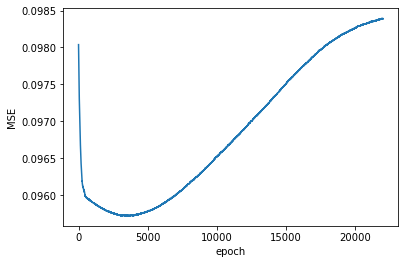

In [29]:
plt.plot(history.history['mse'])
#plt.plot(history.history['val_mse'],color='r')
plt.xlabel('epoch')
plt.ylabel('MSE')


In [30]:
#plt.plot(history.history['val_mse'])
#plt.xlabel('epoch')
#plt.ylabel('MSE')
